<a href="https://colab.research.google.com/github/etodasha/educational_level_predictors/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Data understanding, EDA     

Data preprocessing, preparation, cleansing       

Modeling     

Evaluation     

Results interpretation       


Starting on tabular data, we realize an exploratory data analysis. This task is relatively trivial and brief; however, it will be needed to investigate on different brain regions to obtain a deeper baseline for the study. Definition of preprocessing tasks necessary for the data.


# DATA CLEANSING


I. Dataset perparation / integration


In [2]:
# data loading
df = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/regional_brain_volumes_IXI.csv',delimiter=';')

In [3]:
# replacing decimal separator
df['vol'] = df['vol'].str.replace(',','.')
df['norm_vol'] = df['norm_vol'].str.replace(',','.')

# df['Region'] = df.reg.map(str) + '_' + df.reg_name

df.head()

,IXI_ID,reg,reg_name,vol,norm_vol
0,166,35,Pons,9072.410595,0.007236
1,166,24,Right Accumbens Area,403.94481,0.000322
2,166,31,Left Accumbens Area,422.929162,0.000337
3,166,32,Right Amygdala,1607.341752,0.001282
4,166,33,Left Amygdala,1659.021375,0.001323


In [4]:
# denormalize rows into one row / observation per id
df_wide = pd.DataFrame(index=np.unique(df.IXI_ID),columns=list(['IXI_ID','Sex','Age']+ list(np.unique(df.reg_name))+['Education']))

for x in np.unique(df.IXI_ID):
  df_wide.loc[x]['IXI_ID'] = x
  for i,r in df.loc[df['IXI_ID'] == x].iterrows():
    df_wide.loc[x][[r['reg_name']]] = r['vol']

df_wide_normalized = pd.DataFrame(index=np.unique(df.IXI_ID),columns=list(['IXI_ID','Sex','Age']+ list(np.unique(df.reg_name))+['Education']))

for x in np.unique(df.IXI_ID):
  df_wide_normalized.loc[x]['IXI_ID'] = x
  for i,r in df.loc[df['IXI_ID'] == x].iterrows():
    df_wide_normalized.loc[x][[r['reg_name']]] = r['norm_vol']

In [5]:
df_wide.head(2)

,IXI_ID,Sex,Age,Brain Stem,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Corpus Callosum,Left ACgG anterior cingulate gyrus,Left AIns anterior insula,Left AOrG anterior orbital gyrus,Left Accumbens Area,Left Amygdala,Left AnG angular gyrus,Left Basal Forebrain,Left CO central operculum,Left Calc calcarine cortex,Left Caudate,Left Cerebellum Exterior,Left Cerebellum White Matter,Left Cingulate White Matter,Left Claustrum,Left Cun cuneus,Left Ent entorhinal area,Left FO frontal operculum,Left FRP frontal pole,Left Frontal White Matter,Left FuG fusiform gyrus,Left GRe gyrus rectus,Left Hippocampus,Left IOG inferior occipital gyrus,Left ITG inferior temporal gyrus,Left Insula White Matter,Left LOrG lateral orbital gyrus,Left LiG lingual gyrus,Left MCgG middle cingulate gyrus,Left MFC medial frontal cortex,Left MFG middle frontal gyrus,Left MOG middle occipital gyrus,Left MOrG medial orbital gyrus,...,Right MFG middle frontal gyrus,Right MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Right OCP occipital pole,Right OFuG occipital fusiform gyrus,Right Occipital White Matter,Right OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Right PCu precuneus,Right PHG parahippocampal gyrus,Right PIns posterior insula,Right PO parietal operculum,Right POrG posterior orbital gyrus,Right PP planum polare,Right PT planum temporale,Right Pallidum,Right Parietal White Matter,Right PoG postcentral gyrus,Right PrG precentral gyrus,Right Putamen,Right SCA subcallosal area,Right SFG superior frontal gyrus,Right SMC supplementary motor cortex,Right SMG supramarginal gyrus,Right SOG superior occipital gyrus,Right SPL superior parietal lobule,Right STG superior temporal gyrus,Right TMP temporal pole,Right TTG transverse temporal gyrus,Right Temporal White Matter,Right Thalamus Proper,Right TrIFG triangular part of the inferior frontal gyrus,Right Ventral DC,Right Ventricular Lining,Education
2,2,NaN,NaN,7782.51971,3494.170999,1497.652526,2471.126668,19651.94332,5560.298674,3567.99894,1565.152358,430.31143,1671.675531,7033.693447,397.616199,3734.639151,3650.264361,3094.44543,46838.55541,15250.74333,4072.138312,2703.157341,3582.764529,1998.627843,1847.807905,1902.651519,79282.7716,7291.036557,1452.301076,3737.803205,6931.389014,12327.15685,15339.33686,1695.933283,7601.113911,4877.917558,1590.464795,19149.91332,5409.478736,3426.671167,...,18128.97836,4479.246674,3486.788205,646.52183,3026.945598,5364.127286,13071.76437,1795.073661,4583.660477,22409.94428,3467.803877,1254.020319,4305.22367,9213.727089,2393.079987,1904.760889,1913.198368,2012.338746,1795.073661,1881.557821,1935.34675,54714.94207,9063.961836,12585.55464,4502.449742,708.748238,14511.40923,4825.183314,8388.963515,3950.849551,9241.148896,7270.997545,7036.857502,993.513155,37845.25746,5291.35403,3827.45142,4044.716505,2127.299398,NaN
12,12,NaN,NaN,9071.393846,3498.408718,1517.699773,3001.649446,20295.41121,5967.439412,3763.136059,1649.536098,662.345696,2150.514132,7880.648159,553.712565,3978.292941,4200.832658,2934.149248,51410.89327,17732.51305,5397.906488,2986.883778,5480.172355,2343.522512,1763.442682,2293.952054,87297.79561,9339.285258,1575.707756,4786.18594,8580.962717,12254.45008,17668.17692,1521.918535,7608.537984,4941.225458,2234.88938,18332.632,6394.589104,4207.160801,...,19031.89187,5799.743606,3758.917296,218.320954,3260.048643,7090.6849,16186.33663,1906.880604,4667.005903,29701.14197,3418.252233,1454.418337,4767.201509,10783.15669,2983.719706,2265.475408,2401.530495,2150.514132,2421.569616,2302.389579,2273.912932,53075.19504,11171.28283,13544.33668,5222.827848,1089.495389,17352.82443,5423.219062,8931.119996,4582.630655,9161.042547,9109.362707,7516.779902,1300.433509,4201

In [6]:
df_wide_normalized.head(2)

,IXI_ID,Sex,Age,Brain Stem,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Corpus Callosum,Left ACgG anterior cingulate gyrus,Left AIns anterior insula,Left AOrG anterior orbital gyrus,Left Accumbens Area,Left Amygdala,Left AnG angular gyrus,Left Basal Forebrain,Left CO central operculum,Left Calc calcarine cortex,Left Caudate,Left Cerebellum Exterior,Left Cerebellum White Matter,Left Cingulate White Matter,Left Claustrum,Left Cun cuneus,Left Ent entorhinal area,Left FO frontal operculum,Left FRP frontal pole,Left Frontal White Matter,Left FuG fusiform gyrus,Left GRe gyrus rectus,Left Hippocampus,Left IOG inferior occipital gyrus,Left ITG inferior temporal gyrus,Left Insula White Matter,Left LOrG lateral orbital gyrus,Left LiG lingual gyrus,Left MCgG middle cingulate gyrus,Left MFC medial frontal cortex,Left MFG middle frontal gyrus,Left MOG middle occipital gyrus,Left MOrG medial orbital gyrus,...,Right MFG middle frontal gyrus,Right MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Right OCP occipital pole,Right OFuG occipital fusiform gyrus,Right Occipital White Matter,Right OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Right PCu precuneus,Right PHG parahippocampal gyrus,Right PIns posterior insula,Right PO parietal operculum,Right POrG posterior orbital gyrus,Right PP planum polare,Right PT planum temporale,Right Pallidum,Right Parietal White Matter,Right PoG postcentral gyrus,Right PrG precentral gyrus,Right Putamen,Right SCA subcallosal area,Right SFG superior frontal gyrus,Right SMC supplementary motor cortex,Right SMG supramarginal gyrus,Right SOG superior occipital gyrus,Right SPL superior parietal lobule,Right STG superior temporal gyrus,Right TMP temporal pole,Right TTG transverse temporal gyrus,Right Temporal White Matter,Right Thalamus Proper,Right TrIFG triangular part of the inferior frontal gyrus,Right Ventral DC,Right Ventricular Lining,Education
2,2,NaN,NaN,0.005698,0.002558,0.001096,0.001809,0.014388,0.004071,0.002612,0.001146,0.000315,0.001224,0.00515,0.000291,0.002734,0.002672,0.002266,0.034292,0.011165,0.002981,0.001979,0.002623,0.001463,0.001353,0.001393,0.058045,0.005338,0.001063,0.002737,0.005075,0.009025,0.01123,0.001242,0.005565,0.003571,0.001164,0.01402,0.00396,0.002509,...,0.013273,0.003279,0.002553,0.000473,0.002216,0.003927,0.00957,0.001314,0.003356,0.016407,0.002539,0.000918,0.003152,0.006746,0.001752,0.001395,0.001401,0.001473,0.001314,0.001378,0.001417,0.040058,0.006636,0.009214,0.003296,0.000519,0.010624,0.003533,0.006142,0.002893,0.006766,0.005323,0.005152,0.000727,0.027707,0.003874,0.002802,0.002961,0.001557,NaN
12,12,NaN,NaN,0.005841,0.002253,0.000977,0.001933,0.013068,0.003842,0.002423,0.001062,0.000426,0.001385,0.005074,0.000357,0.002562,0.002705,0.001889,0.033104,0.011418,0.003476,0.001923,0.003529,0.001509,0.001135,0.001477,0.056211,0.006014,0.001015,0.003082,0.005525,0.007891,0.011377,0.00098,0.004899,0.003182,0.001439,0.011804,0.004117,0.002709,...,0.012255,0.003734,0.00242,0.000141,0.002099,0.004566,0.010422,0.001228,0.003005,0.019125,0.002201,0.000937,0.00307,0.006943,0.001921,0.001459,0.001546,0.001385,0.001559,0.001483,0.001464,0.034175,0.007193,0.008721,0.003363,0.000702,0.011174,0.003492,0.005751,0.002951,0.005899,0.005866,0.00484,0.000837,0.027051,0.00395,0.002503,0.003123,0.001488,NaN


In [7]:
demographics = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/IXI_demographics.csv',delimiter=';')
demographics['AGE'] = demographics['AGE'].str.replace(',','.')
demographics.head(2)

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,1,1,170,80,2,3,5,2,1968-02-22,0,NaN,NaN
1,2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.80


In [8]:
# join data to dataset 
for i,r in df_wide.iterrows():
  if i not in list(set(df.IXI_ID) - set(demographics.IXI_ID)):
    edu = demographics.loc[demographics.IXI_ID == i]['QUALIFICATION_ID'].values[0]
    age = demographics.loc[demographics.IXI_ID == i]['AGE'].values[0]
    sex = demographics.loc[demographics.IXI_ID == i]['SEX_ID (1=m, 2=f)'].values[0]
    df_wide.loc[i]['Sex'] = sex
    df_wide.loc[i]['Age'] = age
    df_wide.loc[i]['Education'] = edu

for i,r in df_wide_normalized.iterrows():
  if i not in list(set(df.IXI_ID) - set(demographics.IXI_ID)):
    edu = demographics.loc[demographics.IXI_ID == i]['QUALIFICATION_ID'].values[0]
    age = demographics.loc[demographics.IXI_ID == i]['AGE'].values[0]
    sex = demographics.loc[demographics.IXI_ID == i]['SEX_ID (1=m, 2=f)'].values[0]
    df_wide_normalized.loc[i]['Sex'] = sex
    df_wide_normalized.loc[i]['Age'] = age
    df_wide_normalized.loc[i]['Education'] = edu
    

In [9]:
sex = {1:'M',2:'F'}
education = {1:'No qualifications', 2:'O-levels, GCSEs, or CSEs', 3:'A-levels', 4:'Further education e.g. City & Guilds / NVQs', 5:'University or Polytechnic degree'}
education

{1: 'No qualifications',
 2: 'O-levels, GCSEs, or CSEs',
 3: 'A-levels',
 4: 'Further education e.g. City & Guilds / NVQs',
 5: 'University or Polytechnic degree'}

In [10]:
# validations

# 1. shapes 
print(len(set(df.IXI_ID)))
print(len(set(df_wide.IXI_ID)))
print(len(set(df_wide_normalized.IXI_ID)))

print(df_wide.shape)
print(df_wide_normalized.shape)

539
539
539
(539, 147)
(539, 147)


In [11]:
# random values comparison
df[df.IXI_ID == 66].sort_values(by='reg_name')[:5]

,IXI_ID,reg,reg_name,vol,norm_vol
4152,66,36,Brain Stem,7094.903662,0.005729
4172,66,72,Cerebellar Vermal Lobules I-V,3479.424288,0.002809
4173,66,73,Cerebellar Vermal Lobules VI-VII,1338.402371,0.001081
4174,66,74,Cerebellar Vermal Lobules VIII-X,1964.888587,0.001587
4183,66,87,Corpus Callosum,16633.52544,0.013431


In [12]:
demographics[demographics.IXI_ID == 66]

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
54,66,2,153,71,1,2,1,5,1959-05-27,1,2005-07-27,46.17


In [13]:
df_wide[df_wide.IXI_ID == 66]

,IXI_ID,Sex,Age,Brain Stem,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Corpus Callosum,Left ACgG anterior cingulate gyrus,Left AIns anterior insula,Left AOrG anterior orbital gyrus,Left Accumbens Area,Left Amygdala,Left AnG angular gyrus,Left Basal Forebrain,Left CO central operculum,Left Calc calcarine cortex,Left Caudate,Left Cerebellum Exterior,Left Cerebellum White Matter,Left Cingulate White Matter,Left Claustrum,Left Cun cuneus,Left Ent entorhinal area,Left FO frontal operculum,Left FRP frontal pole,Left Frontal White Matter,Left FuG fusiform gyrus,Left GRe gyrus rectus,Left Hippocampus,Left IOG inferior occipital gyrus,Left ITG inferior temporal gyrus,Left Insula White Matter,Left LOrG lateral orbital gyrus,Left LiG lingual gyrus,Left MCgG middle cingulate gyrus,Left MFC medial frontal cortex,Left MFG middle frontal gyrus,Left MOG middle occipital gyrus,Left MOrG medial orbital gyrus,...,Right MFG middle frontal gyrus,Right MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Right OCP occipital pole,Right OFuG occipital fusiform gyrus,Right Occipital White Matter,Right OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Right PCu precuneus,Right PHG parahippocampal gyrus,Right PIns posterior insula,Right PO parietal operculum,Right POrG posterior orbital gyrus,Right PP planum polare,Right PT planum temporale,Right Pallidum,Right Parietal White Matter,Right PoG postcentral gyrus,Right PrG precentral gyrus,Right Putamen,Right SCA subcallosal area,Right SFG superior frontal gyrus,Right SMC supplementary motor cortex,Right SMG supramarginal gyrus,Right SOG superior occipital gyrus,Right SPL superior parietal lobule,Right STG superior temporal gyrus,Right TMP temporal pole,Right TTG transverse temporal gyrus,Right Temporal White Matter,Right Thalamus Proper,Right TrIFG triangular part of the inferior frontal gyrus,Right Ventral DC,Right Ventricular Lining,Education
66,66,2,46.17,7094.903662,3479.424288,1338.402371,1964.888587,16633.52544,4748.217079,3013.251043,1582.035899,493.595201,1766.606754,7852.171513,409.219953,3677.70612,2443.718119,2570.280991,41521.05952,12119.44968,2875.086574,2430.007141,3629.190353,2026.060642,1579.926518,2370.944468,65266.36368,8132.719212,1507.152867,3570.127679,5299.820262,11883.19898,13202.61692,1685.395578,5988.533224,4154.426271,1852.036693,15049.38016,4909.58474,4123.840244,...,14145.51032,4089.035454,3809.542445,190.898998,2317.155247,5010.835038,13612.89157,1524.027916,3217.861019,19287.12699,3031.180783,1202.347283,3801.10492,7724.55395,2481.68698,1526.137297,1838.325715,2380.436683,1942.740084,1726.528511,1747.622323,43314.03354,6517.987905,9175.808215,3824.308114,693.986414,13415.66443,4595.286942,8057.83618,3646.065402,7973.460932,7305.841782,6255.369945,1001.956069,33959.98261,4962.31927,3450.947641,3939.269389,1879.458648,5


In [14]:
df_wide_normalized[df_wide_normalized.IXI_ID == 66]

,IXI_ID,Sex,Age,Brain Stem,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Corpus Callosum,Left ACgG anterior cingulate gyrus,Left AIns anterior insula,Left AOrG anterior orbital gyrus,Left Accumbens Area,Left Amygdala,Left AnG angular gyrus,Left Basal Forebrain,Left CO central operculum,Left Calc calcarine cortex,Left Caudate,Left Cerebellum Exterior,Left Cerebellum White Matter,Left Cingulate White Matter,Left Claustrum,Left Cun cuneus,Left Ent entorhinal area,Left FO frontal operculum,Left FRP frontal pole,Left Frontal White Matter,Left FuG fusiform gyrus,Left GRe gyrus rectus,Left Hippocampus,Left IOG inferior occipital gyrus,Left ITG inferior temporal gyrus,Left Insula White Matter,Left LOrG lateral orbital gyrus,Left LiG lingual gyrus,Left MCgG middle cingulate gyrus,Left MFC medial frontal cortex,Left MFG middle frontal gyrus,Left MOG middle occipital gyrus,Left MOrG medial orbital gyrus,...,Right MFG middle frontal gyrus,Right MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Right OCP occipital pole,Right OFuG occipital fusiform gyrus,Right Occipital White Matter,Right OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Right PCu precuneus,Right PHG parahippocampal gyrus,Right PIns posterior insula,Right PO parietal operculum,Right POrG posterior orbital gyrus,Right PP planum polare,Right PT planum temporale,Right Pallidum,Right Parietal White Matter,Right PoG postcentral gyrus,Right PrG precentral gyrus,Right Putamen,Right SCA subcallosal area,Right SFG superior frontal gyrus,Right SMC supplementary motor cortex,Right SMG supramarginal gyrus,Right SOG superior occipital gyrus,Right SPL superior parietal lobule,Right STG superior temporal gyrus,Right TMP temporal pole,Right TTG transverse temporal gyrus,Right Temporal White Matter,Right Thalamus Proper,Right TrIFG triangular part of the inferior frontal gyrus,Right Ventral DC,Right Ventricular Lining,Education
66,66,2,46.17,0.005729,0.002809,0.001081,0.001587,0.013431,0.003834,0.002433,0.001277,0.000399,0.001426,0.00634,0.00033,0.00297,0.001973,0.002075,0.033526,0.009786,0.002321,0.001962,0.00293,0.001636,0.001276,0.001914,0.052698,0.006567,0.001217,0.002883,0.004279,0.009595,0.01066,0.001361,0.004835,0.003354,0.001495,0.012151,0.003964,0.00333,...,0.011422,0.003302,0.003076,0.000154,0.001871,0.004046,0.010992,0.001231,0.002598,0.015573,0.002447,0.000971,0.003069,0.006237,0.002004,0.001232,0.001484,0.001922,0.001569,0.001394,0.001411,0.034973,0.005263,0.007409,0.003088,0.00056,0.010832,0.00371,0.006506,0.002944,0.006438,0.005899,0.005051,0.000809,0.027421,0.004007,0.002786,0.003181,0.001518,5


In [15]:
df_wide = df_wide.reset_index(drop=True)
df_wide_normalized = df_wide_normalized.reset_index(drop=True)

In [16]:
df_wide = df_wide.apply(pd.to_numeric)
df_wide_normalized = df_wide_normalized.apply(pd.to_numeric)

In [17]:
# normalization check
df_wide_normalized.loc[:, ~df_wide_normalized.columns.isin(['IXI_ID','Sex','Age','Education'])].sum(skipna = True,axis=1,numeric_only=True)
# confirmed that normalized values are ok

0      0.840206
1      0.828800
2      0.811172
3      0.823097
4      0.822773
         ...   
534    0.815556
535    0.828808
536    0.822498
537    0.794045
538    0.790548
Length: 539, dtype: float64

## MISSING DATA

In [18]:
df_wide.isna().any()[lambda x: x]

Sex          True
Age          True
Education    True
dtype: bool

In [19]:
df_wide[df_wide.isna().any(axis=1)]

,IXI_ID,Sex,Age,Brain Stem,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Corpus Callosum,Left ACgG anterior cingulate gyrus,Left AIns anterior insula,Left AOrG anterior orbital gyrus,Left Accumbens Area,Left Amygdala,Left AnG angular gyrus,Left Basal Forebrain,Left CO central operculum,Left Calc calcarine cortex,Left Caudate,Left Cerebellum Exterior,Left Cerebellum White Matter,Left Cingulate White Matter,Left Claustrum,Left Cun cuneus,Left Ent entorhinal area,Left FO frontal operculum,Left FRP frontal pole,Left Frontal White Matter,Left FuG fusiform gyrus,Left GRe gyrus rectus,Left Hippocampus,Left IOG inferior occipital gyrus,Left ITG inferior temporal gyrus,Left Insula White Matter,Left LOrG lateral orbital gyrus,Left LiG lingual gyrus,Left MCgG middle cingulate gyrus,Left MFC medial frontal cortex,Left MFG middle frontal gyrus,Left MOG middle occipital gyrus,Left MOrG medial orbital gyrus,...,Right MFG middle frontal gyrus,Right MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Right OCP occipital pole,Right OFuG occipital fusiform gyrus,Right Occipital White Matter,Right OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Right PCu precuneus,Right PHG parahippocampal gyrus,Right PIns posterior insula,Right PO parietal operculum,Right POrG posterior orbital gyrus,Right PP planum polare,Right PT planum temporale,Right Pallidum,Right Parietal White Matter,Right PoG postcentral gyrus,Right PrG precentral gyrus,Right Putamen,Right SCA subcallosal area,Right SFG superior frontal gyrus,Right SMC supplementary motor cortex,Right SMG supramarginal gyrus,Right SOG superior occipital gyrus,Right SPL superior parietal lobule,Right STG superior temporal gyrus,Right TMP temporal pole,Right TTG transverse temporal gyrus,Right Temporal White Matter,Right Thalamus Proper,Right TrIFG triangular part of the inferior frontal gyrus,Right Ventral DC,Right Ventricular Lining,Education
62,81,NaN,NaN,6991.518696,3305.388383,1491.327114,2498.552993,17019.48065,4187.106535,3367.614904,1488.163053,454.570004,1510.311476,6600.229899,425.038774,3164.060354,3090.232279,2511.209234,41471.33906,12024.48403,3107.107268,2386.756194,3487.849197,1719.139459,1699.100410,1740.233195,61810.97371,6072.886507,1654.803565,3533.200729,4833.629534,9794.876170,11911.63255,1573.592683,6362.925372,3988.825420,1532.459898,14444.99020,3924.489526,3540.583536,...,13937.68586,3788.434931,3402.419568,343.827892,2041.873615,5152.144943,12217.49171,1275.116323,3081.794785,19328.19002,2571.326381,1129.569546,4098.512846,8629.447273,2566.052947,1560.936441,2022.889253,2440.545220,1836.209692,1681.170735,1602.069226,43283.29096,7256.245079,9414.134241,3653.435022,666.562048,11719.67955,3582.771008,7378.588746,3498.396065,7136.010786,5197.496475,5768.082026,1050.468038,31280.95535,4764.020207,3999.372288,3604.919430,1865.740922,NaN
68,88,NaN,NaN,7963.898505,3754.665432,1576.748545,2586.078550,18376.76699,6694.062218,3608.064731,1706.474345,483.044036,1796.122256,9344.476328,415.544433,3613.338138,3000.568302,3029.044697,49625.91926,14329.95484,3836.930573,2576.586419,3869.625694,2170.534118,1949.051044,2319.244181,76092.09183,8664.206889,1713.857114,3872.789738,6487.344683,12309.185470,14051.51898,1753.935004,7368.003570,5092.001322,1709.638389,18695.28074,6388.204641,3947.672110,...,17688.06010,4855.752710,4015.171713,351.208873,2466.899563,7375.386339,14866.78762,1792.958212,4212.397117,21299.28888,3795.798003,1532.451931,5010.790862,10200.877540,2807.561624,1833.036101,2421.548267,2538.617892,1771.864586,2278.111610,1954.324451,47778.11762,8096.788349,12369.302300,4504.543837,818.432690,16425.60658,5263.914374,7761.399695,3654.470708,8839.283985,7866.867825,7138.08

In [20]:
df_wide['Education'].value_counts(dropna=False).sort_index()

0.0     15
1.0     43
2.0     48
3.0     33
4.0     96
5.0    290
NaN     14
Name: Education, dtype: int64

In [21]:
df_wide['Sex'].value_counts(dropna=False).sort_index()

1.0    236
2.0    289
NaN     14
Name: Sex, dtype: int64

In [22]:
df_wide['Age'].value_counts(dropna=False).sort_index()

19.98     1
20.07     1
20.17     1
20.21     1
20.70     1
         ..
83.46     1
83.81     1
86.20     1
86.32     1
NaN      16
Name: Age, Length: 490, dtype: int64

In [23]:
df_wide_normalized.isna().any()[lambda x: x]

Sex          True
Age          True
Education    True
dtype: bool

In [24]:
df_wide_normalized[df_wide_normalized.isna().any(axis=1)]

,IXI_ID,Sex,Age,Brain Stem,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Corpus Callosum,Left ACgG anterior cingulate gyrus,Left AIns anterior insula,Left AOrG anterior orbital gyrus,Left Accumbens Area,Left Amygdala,Left AnG angular gyrus,Left Basal Forebrain,Left CO central operculum,Left Calc calcarine cortex,Left Caudate,Left Cerebellum Exterior,Left Cerebellum White Matter,Left Cingulate White Matter,Left Claustrum,Left Cun cuneus,Left Ent entorhinal area,Left FO frontal operculum,Left FRP frontal pole,Left Frontal White Matter,Left FuG fusiform gyrus,Left GRe gyrus rectus,Left Hippocampus,Left IOG inferior occipital gyrus,Left ITG inferior temporal gyrus,Left Insula White Matter,Left LOrG lateral orbital gyrus,Left LiG lingual gyrus,Left MCgG middle cingulate gyrus,Left MFC medial frontal cortex,Left MFG middle frontal gyrus,Left MOG middle occipital gyrus,Left MOrG medial orbital gyrus,...,Right MFG middle frontal gyrus,Right MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Right OCP occipital pole,Right OFuG occipital fusiform gyrus,Right Occipital White Matter,Right OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Right PCu precuneus,Right PHG parahippocampal gyrus,Right PIns posterior insula,Right PO parietal operculum,Right POrG posterior orbital gyrus,Right PP planum polare,Right PT planum temporale,Right Pallidum,Right Parietal White Matter,Right PoG postcentral gyrus,Right PrG precentral gyrus,Right Putamen,Right SCA subcallosal area,Right SFG superior frontal gyrus,Right SMC supplementary motor cortex,Right SMG supramarginal gyrus,Right SOG superior occipital gyrus,Right SPL superior parietal lobule,Right STG superior temporal gyrus,Right TMP temporal pole,Right TTG transverse temporal gyrus,Right Temporal White Matter,Right Thalamus Proper,Right TrIFG triangular part of the inferior frontal gyrus,Right Ventral DC,Right Ventricular Lining,Education
62,81,NaN,NaN,0.005818,0.002750,0.001241,0.002079,0.014162,0.003484,0.002802,0.001238,0.000378,0.001257,0.005492,0.000354,0.002633,0.002571,0.002090,0.034509,0.010006,0.002585,0.001986,0.002902,0.001431,0.001414,0.001448,0.051433,0.005053,0.001377,0.002940,0.004022,0.008150,0.009912,0.001309,0.005295,0.003319,0.001275,0.012020,0.003266,0.002946,...,0.011598,0.003152,0.002831,0.000286,0.001699,0.004287,0.010166,0.001061,0.002564,0.016083,0.002140,0.000940,0.003410,0.007181,0.002135,0.001299,0.001683,0.002031,0.001528,0.001399,0.001333,0.036016,0.006038,0.007834,0.003040,0.000555,0.009752,0.002981,0.006140,0.002911,0.005938,0.004325,0.004800,0.000874,0.026029,0.003964,0.003328,0.003000,0.001552,NaN
68,88,NaN,NaN,0.005774,0.002722,0.001143,0.001875,0.013323,0.004853,0.002616,0.001237,0.000350,0.001302,0.006775,0.000301,0.002620,0.002175,0.002196,0.035980,0.010389,0.002782,0.001868,0.002806,0.001574,0.001413,0.001681,0.055168,0.006282,0.001243,0.002808,0.004703,0.008924,0.010188,0.001272,0.005342,0.003692,0.001240,0.013554,0.004632,0.002862,...,0.012824,0.003520,0.002911,0.000255,0.001789,0.005347,0.010779,0.001300,0.003054,0.015442,0.002752,0.001111,0.003633,0.007396,0.002036,0.001329,0.001756,0.001841,0.001285,0.001652,0.001417,0.034640,0.005870,0.008968,0.003266,0.000593,0.011909,0.003816,0.005627,0.002650,0.006409,0.005704,0.005175,0.000798,0.025998,0.003625,0.002457,0.002955,0.001262,NaN
96,117,NaN,NaN,0.005556,0.003352,0.001106,0.001769,0.014684,0.004231,0.002741,0.001109,0.000404,0.001248,0.005823,0.000342,0.002322,0.002287,0.002136,0.035479,0.010504,0.002598,0.001907,0.003302,0.001410,0.001515,0.001697,0.052421,0.005605,0.001239,0.002870,0.004718,0.009118,0.010920,0.001212,0.005522,0.003153,0.001211,0.011710,0.004177,0.002835,...,0.011429,0.003043,

In [25]:
df_wide = df_wide.dropna()
df_wide_normalized = df_wide_normalized.dropna() 

df_wide = df_wide[df_wide['Education'] != 0]
df_wide_normalized = df_wide_normalized[df_wide_normalized['Education'] != 0]

In [26]:
print(df_wide.shape)
print(df_wide_normalized.shape)
pd.Series.equals(df_wide.IXI_ID,df_wide_normalized.IXI_ID)

(509, 147)
(509, 147)


True

# EDA

II. EDA

1. histogram
2. boxplots / outliers
3. distributions

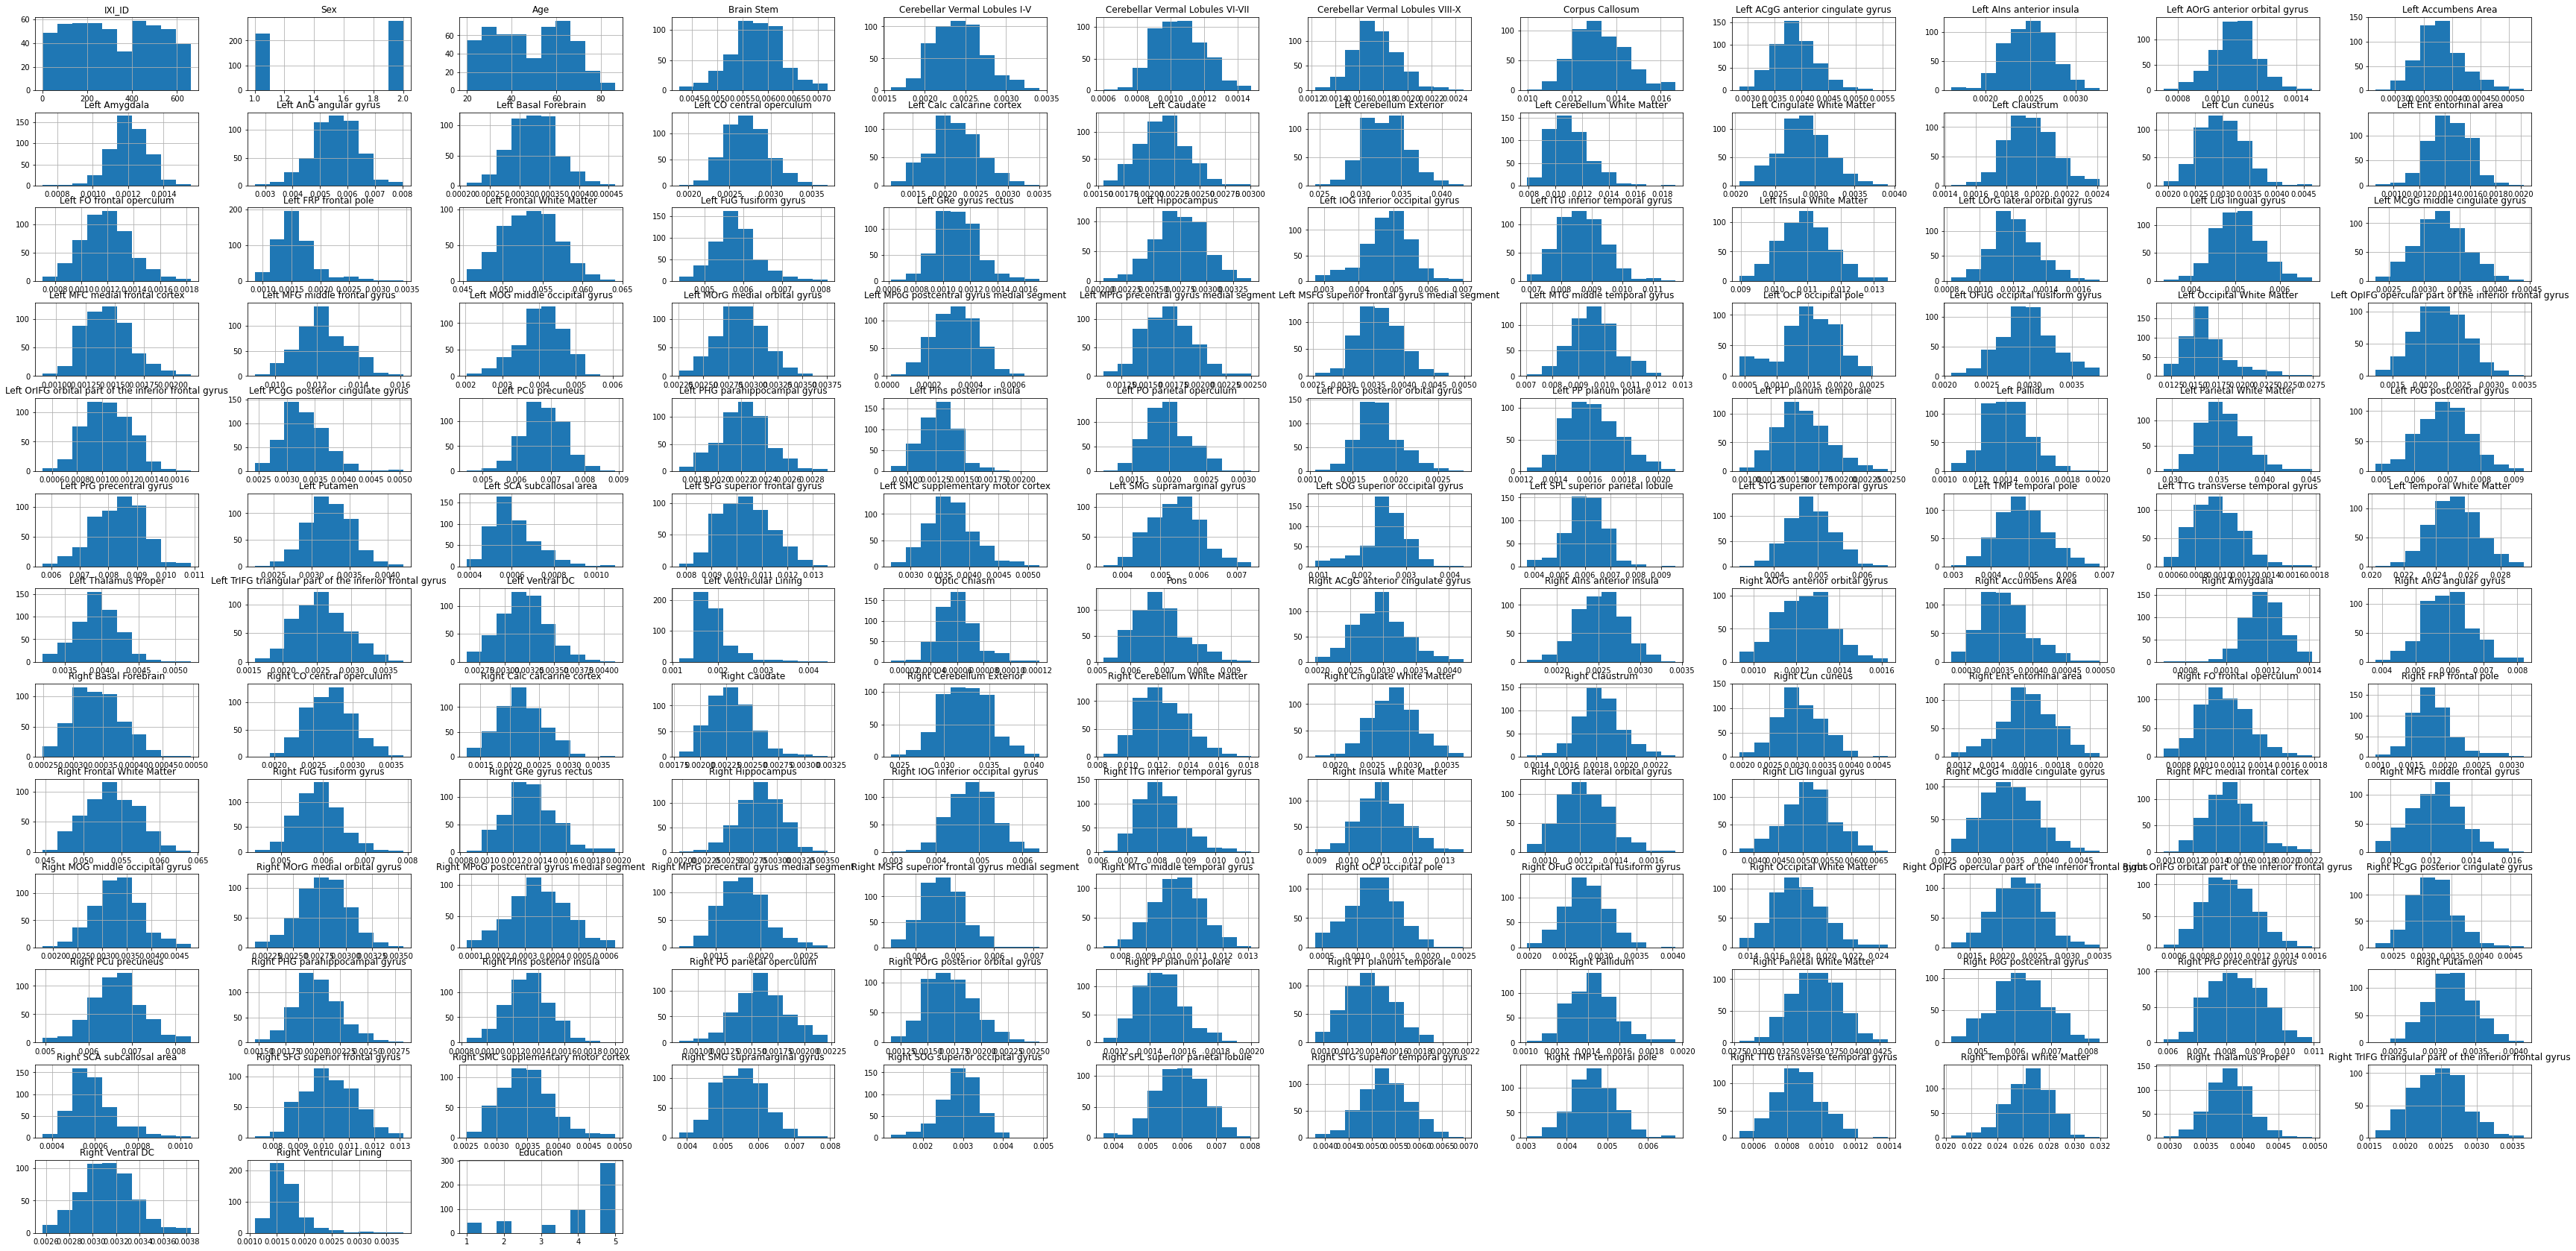

In [27]:
import matplotlib.pyplot as plt

df_wide_normalized.hist(figsize=(60,30));

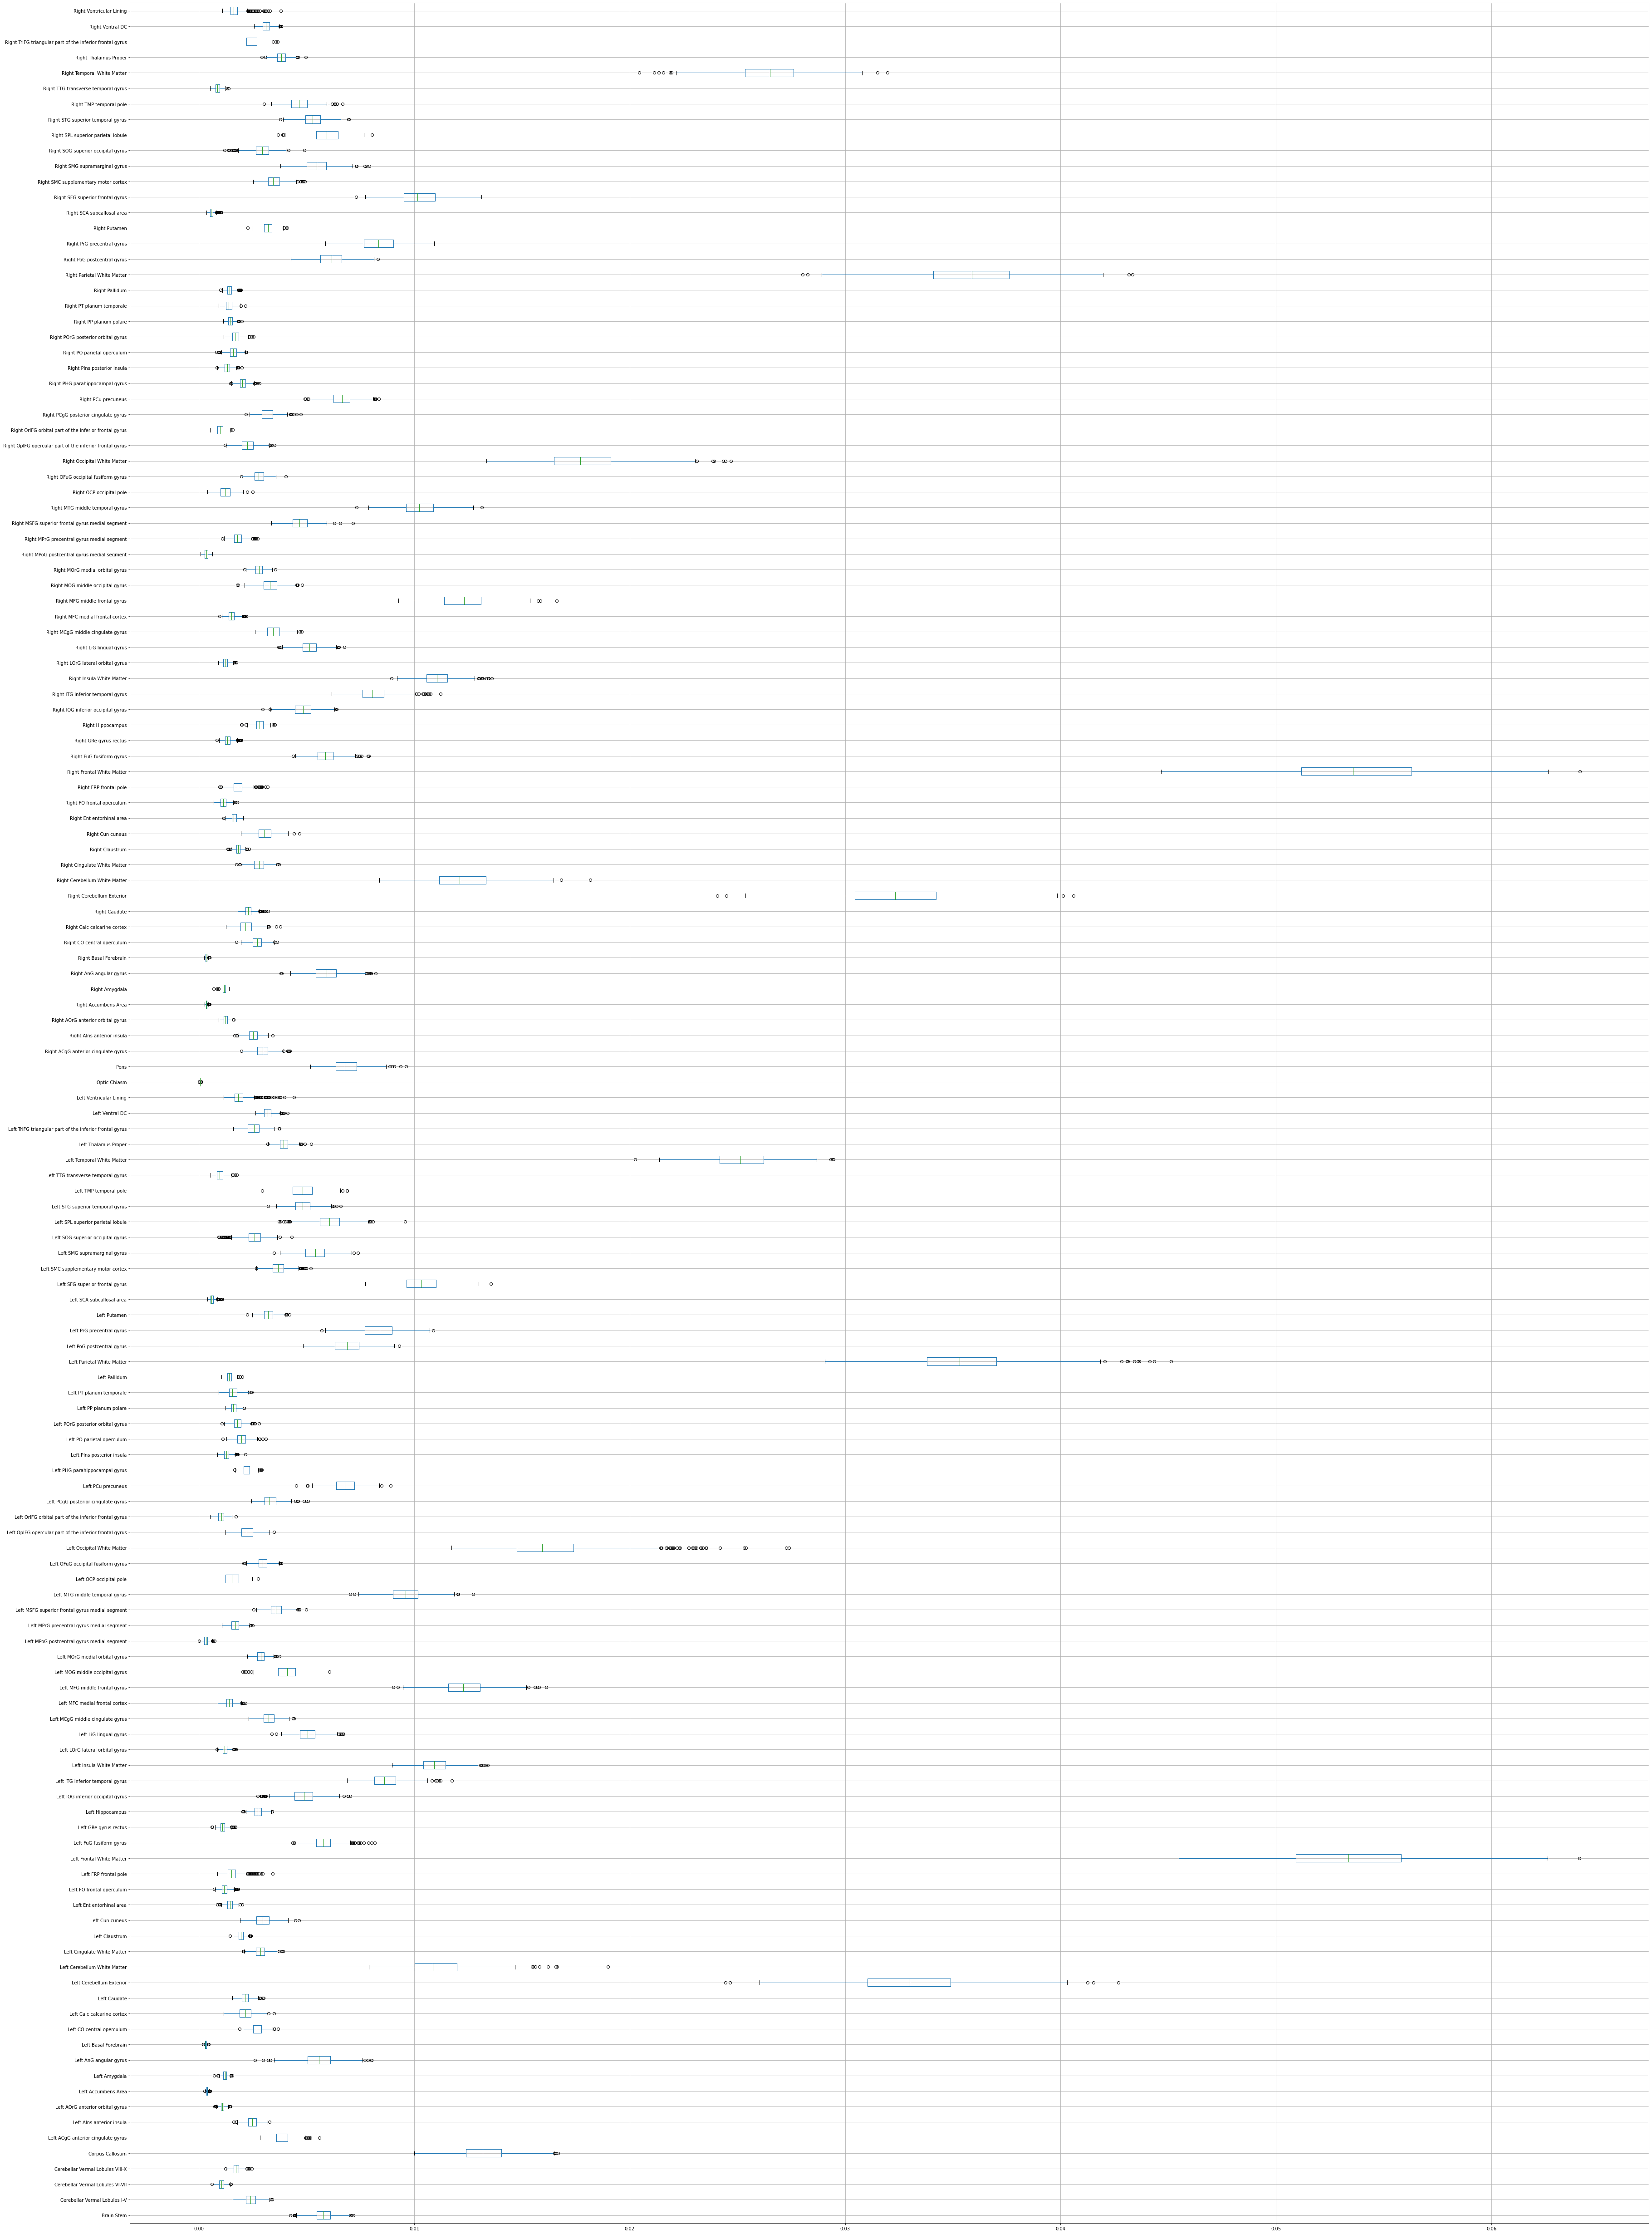

In [28]:
df_wide_normalized.iloc[:,3:-1].boxplot(vert=False,figsize=(60,90));
# no special outlier tratment as data is limited and very natural

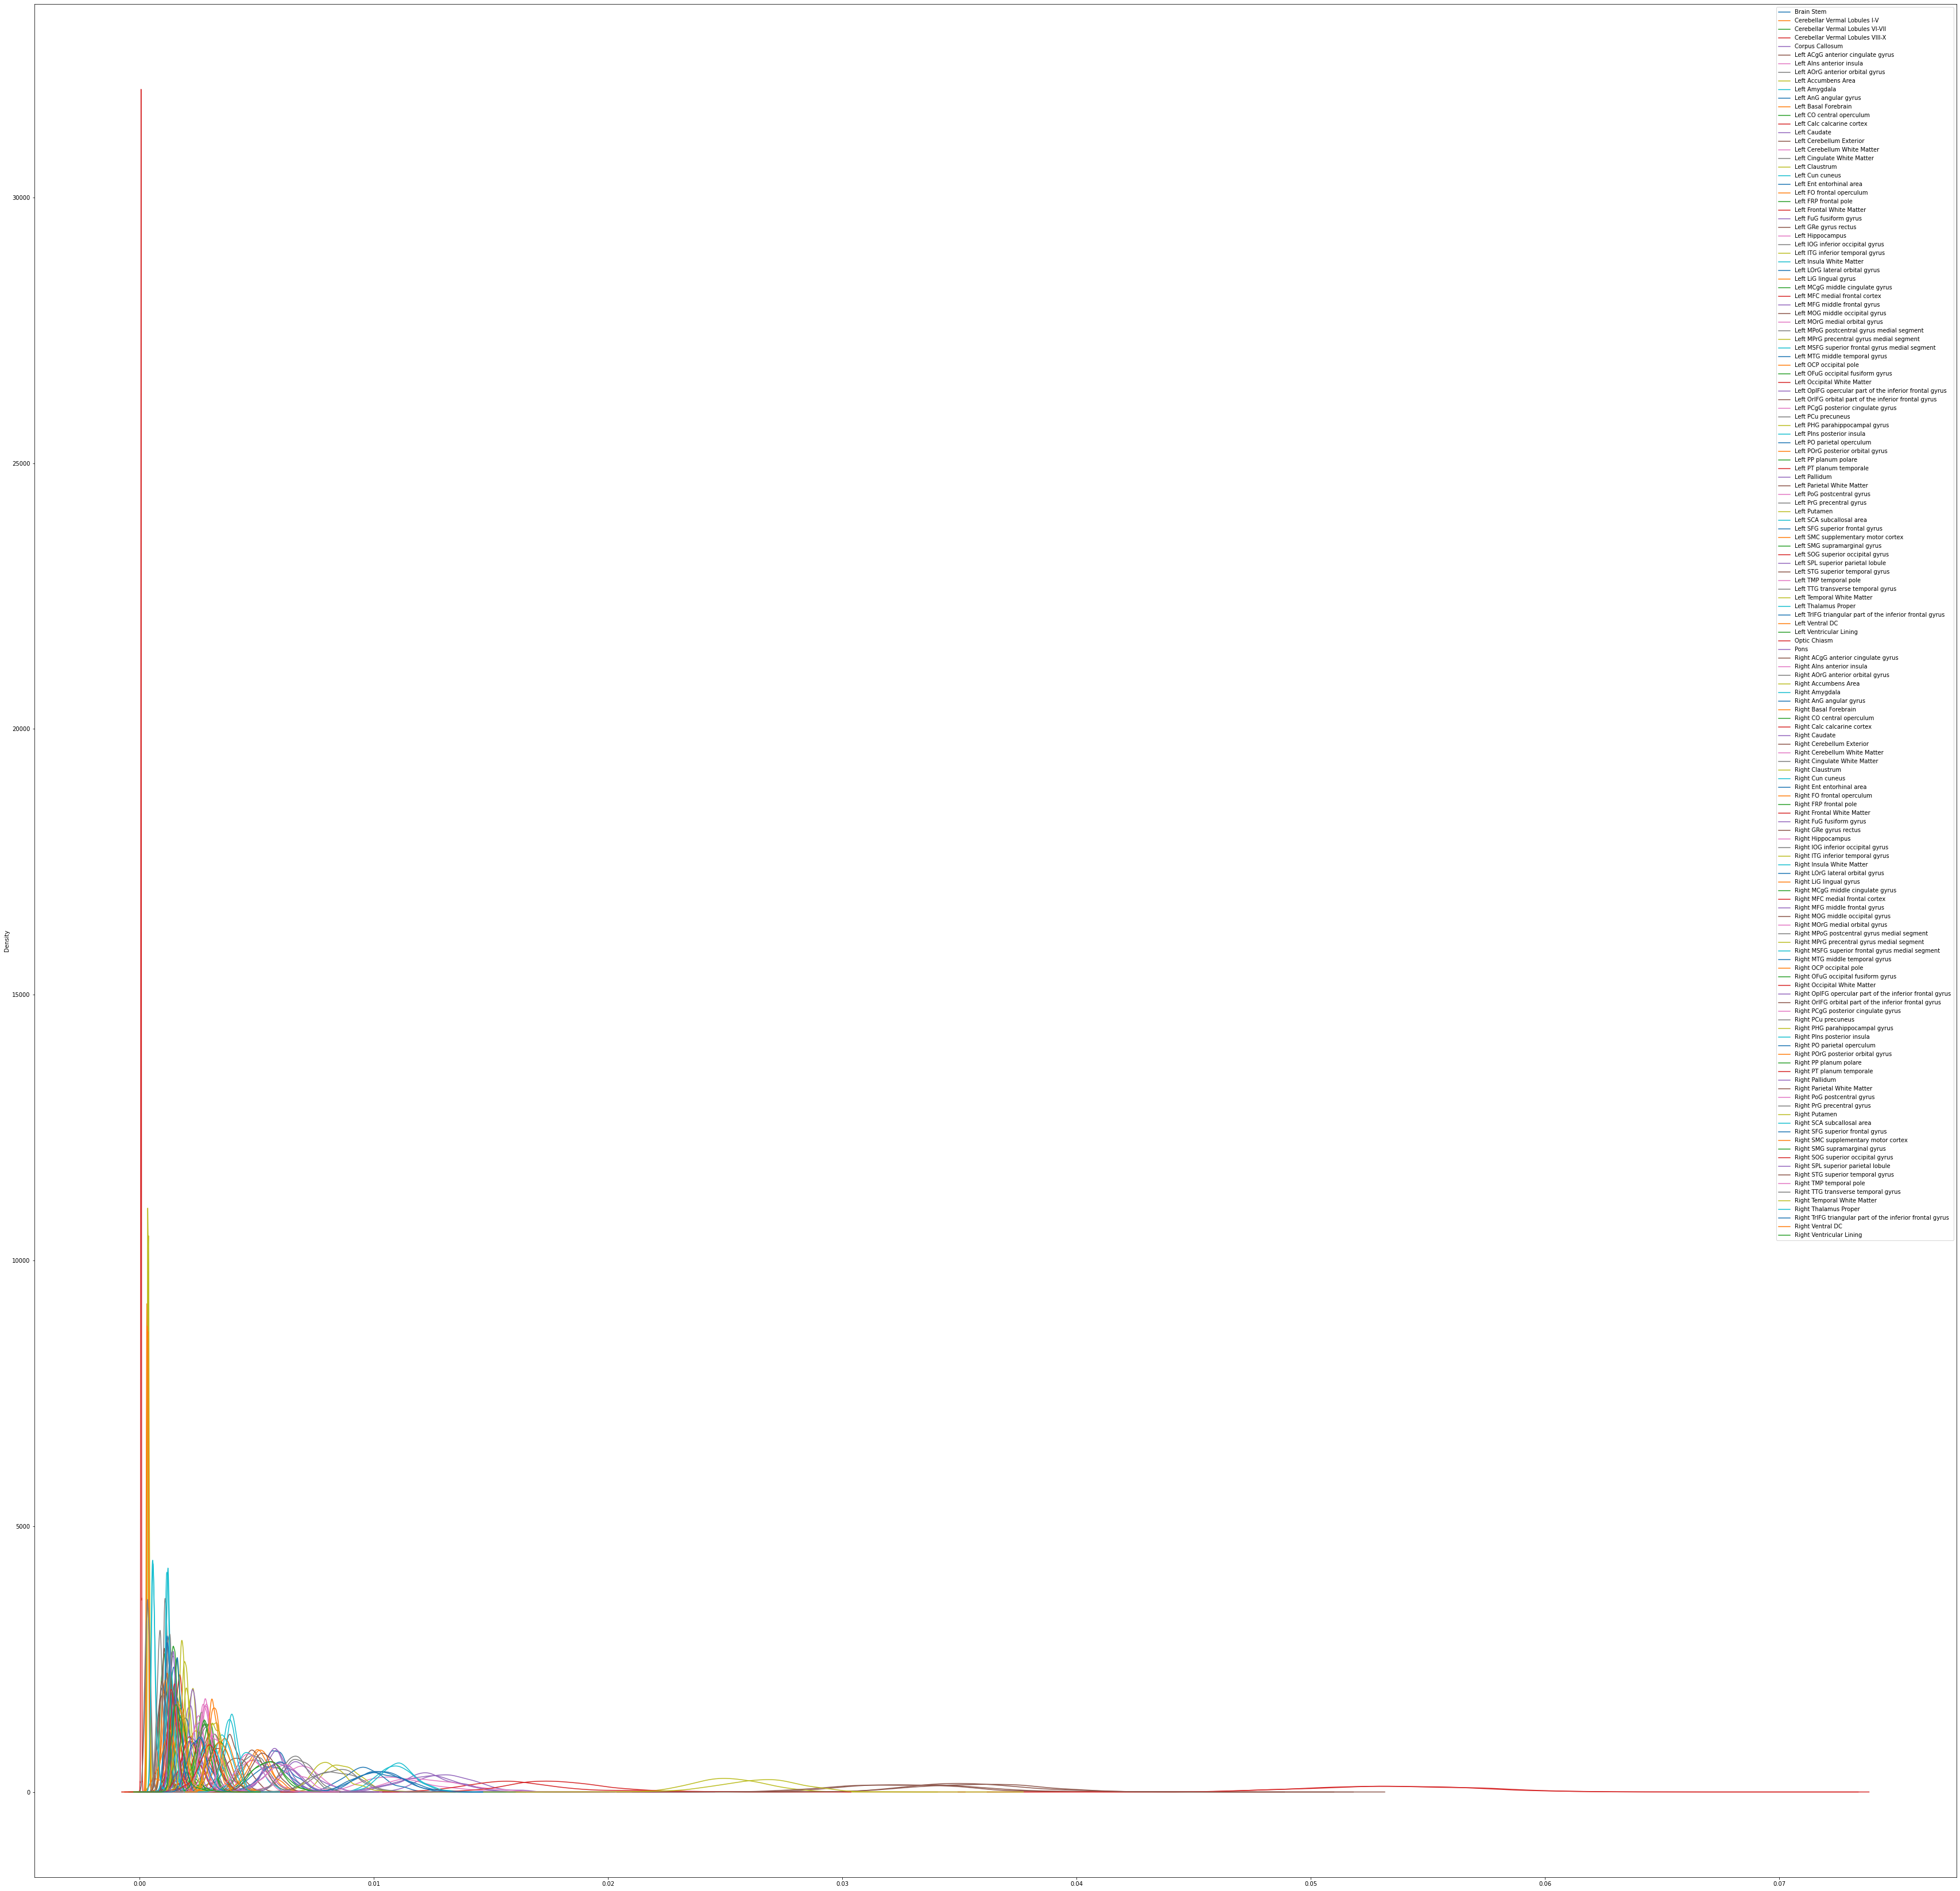

In [29]:
df_wide_normalized.iloc[:,3:-1].plot.kde(figsize=(60,60));

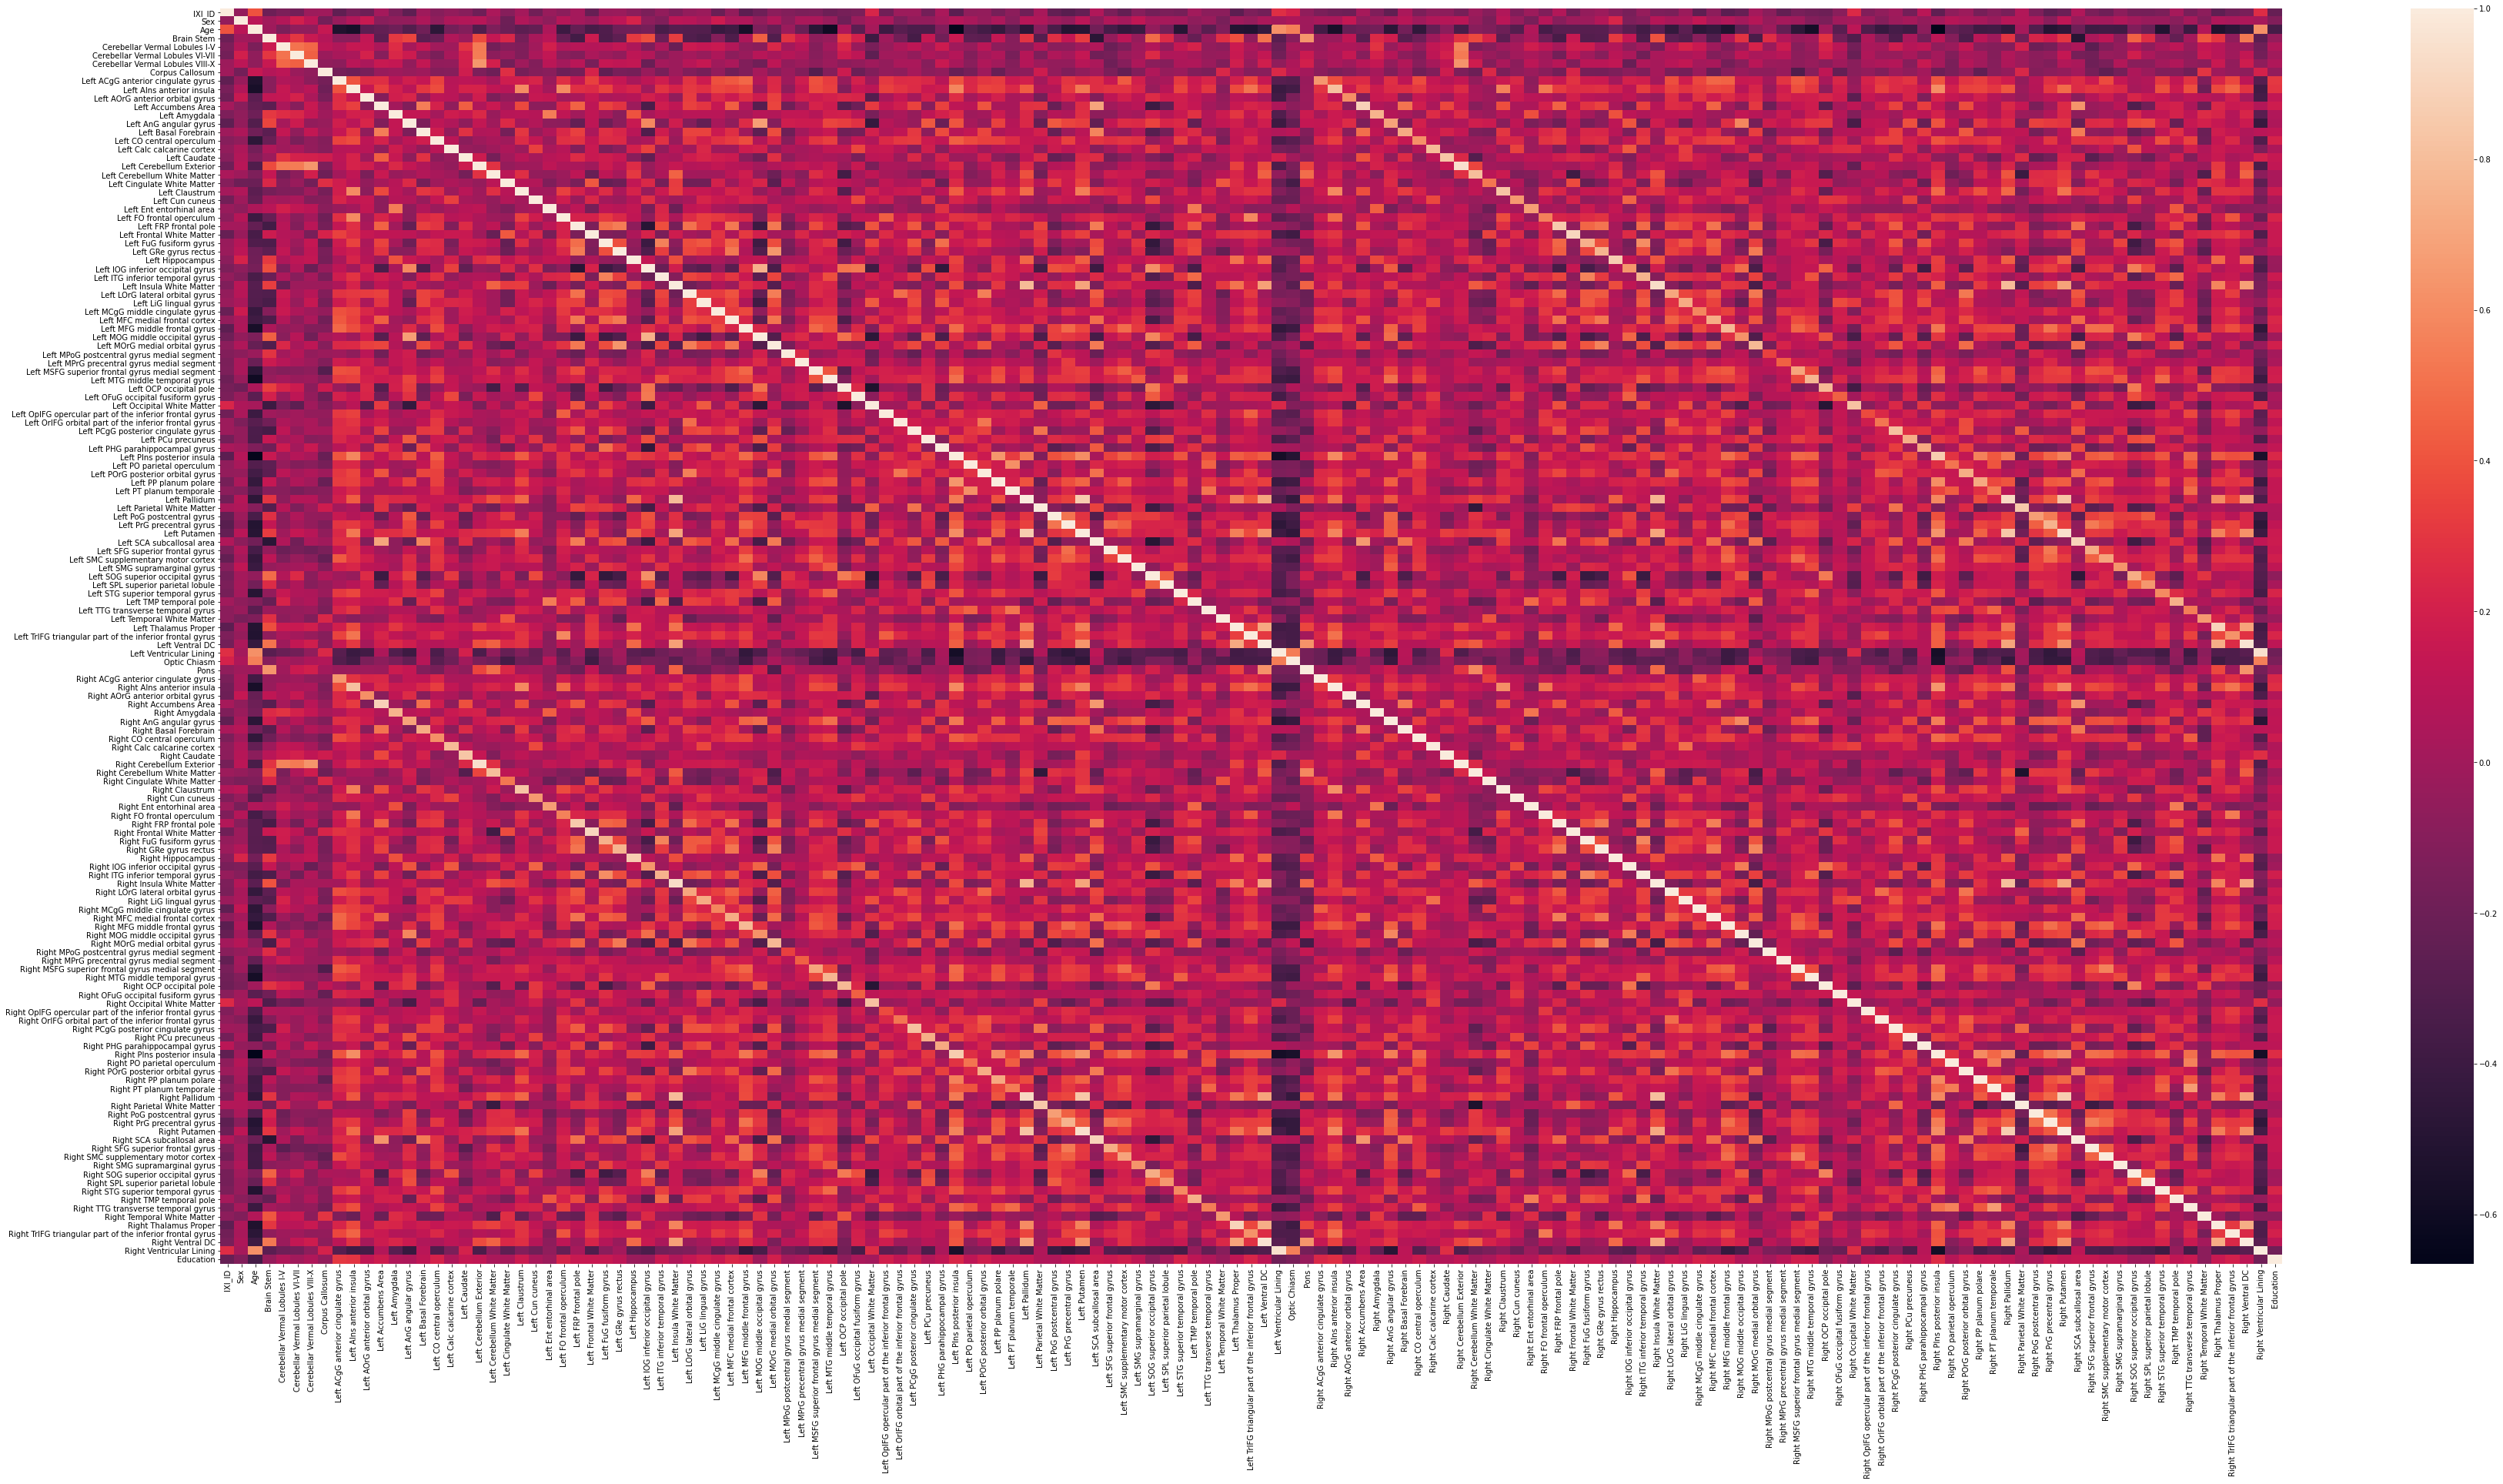

In [30]:
import seaborn as sns

corr = df_wide_normalized.corr()
fig, ax = plt.subplots(figsize=(60,30))  
sns.heatmap(corr, ax=ax);

# symmetric regions seem to be intercorrelated ; Education quite correlated with age

# DATA PREPARATION

## BINARY CLASSIFICATION


Convert the problem in binary classification:  

1. Why?     
Dealing with imbalanced classes;      
widening the scope of possible algorithms with those that don't admit discrete classification (convert our data to continious data with binary numeric labels);

Procedure:
1. class distributions
2. clustering to find optimal combinations 

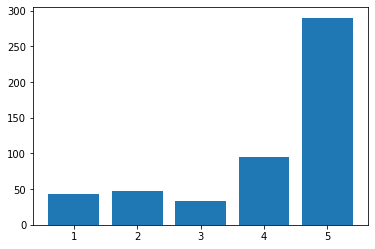

In [31]:
plt.bar(df_wide_normalized.Education.value_counts().index, df_wide_normalized.Education.value_counts());

In [32]:
df_wide_normalized.Education.value_counts()

5.0    290
4.0     95
2.0     48
1.0     43
3.0     33
Name: Education, dtype: int64

### CLUSTERING


In [33]:
X,y = df_wide_normalized.iloc[:,1:-1], df_wide_normalized.Education

#### K-MEANS


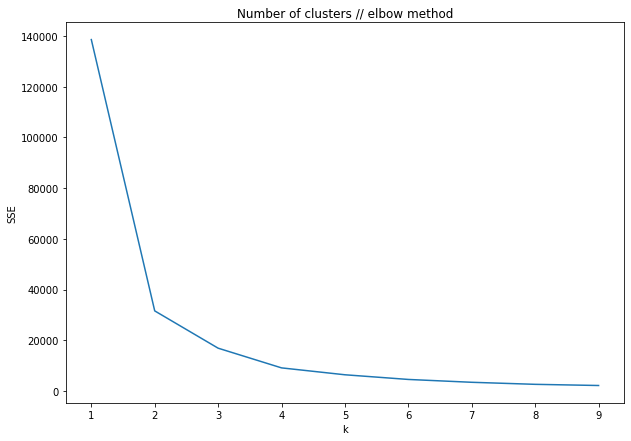

In [34]:
# what the elbow method tells us about proximity of classes
from sklearn import cluster 

sse = {}
for k in range(1, 10):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300, random_state=48).fit(X)
    sse[k] = kmeans.inertia_ 

plt.figure(figsize=(10,7))    
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Number of clusters // elbow method");

# 2 seem to be fine with data

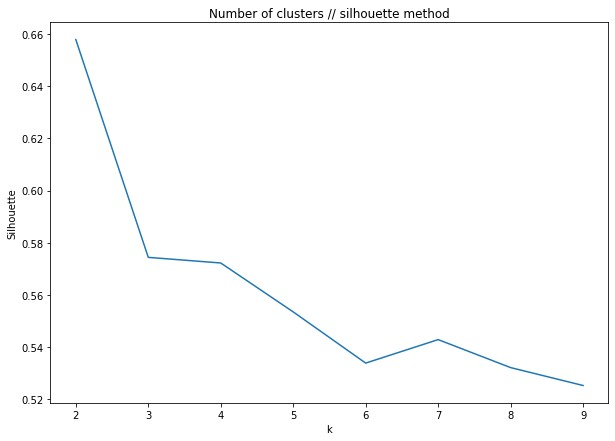

In [35]:
import sklearn 
from sklearn import metrics

sil = {}

for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300, random_state=48).fit(X)
    labels = kmeans.labels_
    sil[k] = metrics.silhouette_score(X, labels, metric = 'euclidean')
        
plt.figure(figsize=(10,7))
plt.plot(list(sil.keys()), list(sil.values()))
plt.title("Number of clusters // silhouette method")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

# the result is ambigious, no evidence that 2 clusters are fine silhoutte wise 

In [36]:
kmeans = cluster.KMeans(n_clusters=2, max_iter=100, random_state=42)

y_kmeans = kmeans.fit_predict(X)

np.unique(y_kmeans, return_counts=True)

(array([0, 1], dtype=int32), array([248, 261]))

In [37]:
# clusters per each educational level 
pd.concat([y, pd.Series(y_kmeans)],axis=1).groupby(['Education',0]).size()

# not a single level is entirely in the same clusters. 
# However respective majorities of levels 1-4 fall in cluster 0 
# and the majority of level 5 falls in the cluster 1. Therefore the binary classification can be 
# levels 1-4 ==> 'low' and 5 ==> 'high'

Education  0  
1.0        0.0     25
           1.0     16
2.0        0.0     26
           1.0     19
3.0        0.0     14
           1.0     13
4.0        0.0     48
           1.0     42
5.0        0.0    119
           1.0    160
dtype: int64

#### DENSITY BASED DBSCAN


In [38]:
eps = [0.9, 1, 1.1, 1.2, 1.3]
min_sample = [10, 15, 20, 25, 30]
tune = [(e, s) for e in eps for s in min_sample]

for x in tune:
    db = cluster.DBSCAN(eps=x[0], min_samples=x[1]).fit(X)
    labels = db.labels_
    if len(np.unique(labels)) == 3 :
      print('eps',x[0],'min_sample',x[1])
    
# should be 3 because there are grouped in separate '-1' cluster.

eps 0.9 min_sample 15
eps 1.1 min_sample 10
eps 1.2 min_sample 10
eps 1.3 min_sample 10
eps 1.3 min_sample 15
eps 1.3 min_sample 30


In [39]:
eps = [0.9, 1.1, 1.2, 1.3, 1.3, 1.3]
min_sample = [15, 10, 10, 10, 15, 30]
tune =  zip(eps,min_sample)

for x in list(tune):
    db = cluster.DBSCAN(eps=x[0], min_samples=x[1]).fit(X)
    labels = db.labels_
    print('eps',x[0],'min_samples',x[1])
    print(pd.concat([y, pd.Series(labels)],axis=1).groupby(['Education',0]).size())
  

# most of the valid hyperparameters (without too much residuals) lead to same conslusions, 
# with majority of educational level 5 in cluster "0" 
# and for other levels in cluster "1"

eps 0.9 min_samples 15
Education  0   
1.0        -1.0     32
            0.0      6
            1.0      3
2.0        -1.0     41
            0.0      4
3.0        -1.0     27
4.0        -1.0     75
            0.0     10
            1.0      5
5.0        -1.0    250
            0.0     22
            1.0      7
dtype: int64
eps 1.1 min_samples 10
Education  0   
1.0        -1.0      3
            0.0     16
            1.0     22
2.0        -1.0      6
            0.0     19
            1.0     20
3.0        -1.0      3
            0.0     11
            1.0     13
4.0        -1.0      3
            0.0     42
            1.0     45
5.0        -1.0     20
            0.0    158
            1.0    101
dtype: int64
eps 1.2 min_samples 10
Education  0   
1.0        -1.0      2
            0.0     17
            1.0     22
2.0        -1.0      4
            0.0     21
            1.0     20
3.0        -1.0      1
            0.0     13
            1.0     13
4.0        -1.0      2
      

#### HIERARCHY CLUSTERING


In [40]:
from scipy.cluster import hierarchy

methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for method in methods:
    Z = hierarchy.linkage(X, method=method)
    labels = hierarchy.fcluster(Z, 2, 'maxclust')
    print(method)
    print(pd.concat([y, pd.Series(labels)],axis=1).groupby(['Education',0]).size())
    
# same results as before, majorities in observations fall in different clusters for educational levels 1-4 and 5 

single
Education  0  
1.0        2.0     41
2.0        1.0      2
           2.0     43
3.0        2.0     27
4.0        2.0     90
5.0        2.0    279
dtype: int64
complete
Education  0  
1.0        1.0     15
           2.0     26
2.0        1.0     17
           2.0     28
3.0        1.0     13
           2.0     14
4.0        1.0     38
           2.0     52
5.0        1.0    150
           2.0    129
dtype: int64
average
Education  0  
1.0        1.0     24
           2.0     17
2.0        1.0     24
           2.0     21
3.0        1.0     14
           2.0     13
4.0        1.0     48
           2.0     42
5.0        1.0    111
           2.0    168
dtype: int64
weighted
Education  0  
1.0        1.0     16
           2.0     25
2.0        1.0     18
           2.0     27
3.0        1.0     13
           2.0     14
4.0        1.0     39
           2.0     51
5.0        1.0    152
           2.0    127
dtype: int64
centroid
Education  0  
1.0        1.0     24
           2.0   

### BINARY CONVERSION


In all three methods we got more or less same conclusions, so the binary classification groups will consist in level 5 as 1 (would translate to superior education) and levels 1-4 as (non superior education) 

In [41]:
data = df_wide_normalized

data['Binary_Eduaction'] = np.where(data['Education'] == 5, 1, 0)

data.sample(5)

,IXI_ID,Sex,Age,Brain Stem,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Corpus Callosum,Left ACgG anterior cingulate gyrus,Left AIns anterior insula,Left AOrG anterior orbital gyrus,Left Accumbens Area,Left Amygdala,Left AnG angular gyrus,Left Basal Forebrain,Left CO central operculum,Left Calc calcarine cortex,Left Caudate,Left Cerebellum Exterior,Left Cerebellum White Matter,Left Cingulate White Matter,Left Claustrum,Left Cun cuneus,Left Ent entorhinal area,Left FO frontal operculum,Left FRP frontal pole,Left Frontal White Matter,Left FuG fusiform gyrus,Left GRe gyrus rectus,Left Hippocampus,Left IOG inferior occipital gyrus,Left ITG inferior temporal gyrus,Left Insula White Matter,Left LOrG lateral orbital gyrus,Left LiG lingual gyrus,Left MCgG middle cingulate gyrus,Left MFC medial frontal cortex,Left MFG middle frontal gyrus,Left MOG middle occipital gyrus,Left MOrG medial orbital gyrus,...,Right MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Right OCP occipital pole,Right OFuG occipital fusiform gyrus,Right Occipital White Matter,Right OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Right PCu precuneus,Right PHG parahippocampal gyrus,Right PIns posterior insula,Right PO parietal operculum,Right POrG posterior orbital gyrus,Right PP planum polare,Right PT planum temporale,Right Pallidum,Right Parietal White Matter,Right PoG postcentral gyrus,Right PrG precentral gyrus,Right Putamen,Right SCA subcallosal area,Right SFG superior frontal gyrus,Right SMC supplementary motor cortex,Right SMG supramarginal gyrus,Right SOG superior occipital gyrus,Right SPL superior parietal lobule,Right STG superior temporal gyrus,Right TMP temporal pole,Right TTG transverse temporal gyrus,Right Temporal White Matter,Right Thalamus Proper,Right TrIFG triangular part of the inferior frontal gyrus,Right Ventral DC,Right Ventricular Lining,Education,Binary_Eduaction
325,395,1.0,45.03,0.005317,0.002082,0.000781,0.001656,0.011768,0.004655,0.002598,0.000881,0.000466,0.001281,0.004470,0.000394,0.002771,0.002424,0.002159,0.032602,0.015625,0.003036,0.002255,0.003399,0.001794,0.001627,0.001340,0.053677,0.006197,0.001220,0.002844,0.004112,0.009822,0.010939,0.001398,0.006723,0.003515,0.001654,0.012493,0.002998,0.002889,...,0.002982,0.002799,0.000222,0.001536,0.004566,0.011155,0.000748,0.003182,0.020983,0.002158,0.000909,0.002904,0.006481,0.002732,0.001438,0.001523,0.002000,0.001564,0.001354,0.001402,0.030699,0.005583,0.008319,0.003246,0.000594,0.009315,0.003787,0.005748,0.002524,0.005313,0.005761,0.006327,0.000925,0.024659,0.004266,0.002513,0.003278,0.001616,5.0,1
8,20,1.0,39.47,0.006404,0.002730,0.001168,0.001877,0.013003,0.003787,0.002385,0.001167,0.000379,0.001365,0.005255,0.000334,0.003012,0.002553,0.002203,0.034970,0.010612,0.003109,0.001858,0.003377,0.001742,0.001068,0.001393,0.054390,0.005701,0.001075,0.002803,0.004864,0.009561,0.011643,0.001164,0.005189,0.003104,0.001345,0.011626,0.004059,0.003051,...,0.003081,0.002684,0.000269,0.001551,0.004416,0.010278,0.001533,0.002723,0.018104,0.002355,0.000789,0.003264,0.007246,0.001694,0.001325,0.001739,0.001698,0.001366,0.001229,0.001526,0.038906,0.005714,0.007299,0.003403,0.000602,0.009564,0.002822,0.005865,0.002778,0.006139,0.004750,0.004597,0.000815,0.029112,0.003788,0.002112,0.003403,0.001618,4.0,0
106,129,1.0,23.04,0.006013,0.002575,0.000923,0.001637,0.014565,0.004561,0.002284,0.001264,0.000380,0.001229,0.006674,0.000308,0.002806,0.001859,0.002181,0.035838,0.009894,0.003405,0.001815,0.003434,0.001527,0.000999,0.001817,0.054846,0.005901,0.001179,0.002531,0.005000,0.009573,0.009692,0.001226,0.005769,0.003588,0.001757,0.013267,0.004436,0.002849,...,0.003296,0.002631,0.000217,0.002307,0.

## PARTIALLING OUT AGE AND GENDER

REGRESSING OUT sex and age

In [42]:
X,y = data.iloc[:,1:-2], data.iloc[:,-1]
X.shape # 143 regions + sex + age -- ok

(509, 145)

In [43]:
from sklearn.linear_model import LinearRegression

X_regress = X.iloc[:,:2]
X_features = X.iloc[:,2:]

data = []

# we fit regression for each region based on dependant variables age and gender, we save residuals as final data 
for region in X_features:
  regression = LinearRegression().fit(X_regress,X[region])
  prediction = regression.predict(X_regress)
  residuals = (X[region] - prediction)
  data.append(residuals)

X = pd.DataFrame(data).T

X.head()

,Brain Stem,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Corpus Callosum,Left ACgG anterior cingulate gyrus,Left AIns anterior insula,Left AOrG anterior orbital gyrus,Left Accumbens Area,Left Amygdala,Left AnG angular gyrus,Left Basal Forebrain,Left CO central operculum,Left Calc calcarine cortex,Left Caudate,Left Cerebellum Exterior,Left Cerebellum White Matter,Left Cingulate White Matter,Left Claustrum,Left Cun cuneus,Left Ent entorhinal area,Left FO frontal operculum,Left FRP frontal pole,Left Frontal White Matter,Left FuG fusiform gyrus,Left GRe gyrus rectus,Left Hippocampus,Left IOG inferior occipital gyrus,Left ITG inferior temporal gyrus,Left Insula White Matter,Left LOrG lateral orbital gyrus,Left LiG lingual gyrus,Left MCgG middle cingulate gyrus,Left MFC medial frontal cortex,Left MFG middle frontal gyrus,Left MOG middle occipital gyrus,Left MOrG medial orbital gyrus,Left MPoG postcentral gyrus medial segment,Left MPrG precentral gyrus medial segment,Left MSFG superior frontal gyrus medial segment,...,Right MFC medial frontal cortex,Right MFG middle frontal gyrus,Right MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Right OCP occipital pole,Right OFuG occipital fusiform gyrus,Right Occipital White Matter,Right OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Right PCu precuneus,Right PHG parahippocampal gyrus,Right PIns posterior insula,Right PO parietal operculum,Right POrG posterior orbital gyrus,Right PP planum polare,Right PT planum temporale,Right Pallidum,Right Parietal White Matter,Right PoG postcentral gyrus,Right PrG precentral gyrus,Right Putamen,Right SCA subcallosal area,Right SFG superior frontal gyrus,Right SMC supplementary motor cortex,Right SMG supramarginal gyrus,Right SOG superior occipital gyrus,Right SPL superior parietal lobule,Right STG superior temporal gyrus,Right TMP temporal pole,Right TTG transverse temporal gyrus,Right Temporal White Matter,Right Thalamus Proper,Right TrIFG triangular part of the inferior frontal gyrus,Right Ventral DC,Right Ventricular Lining
0,-0.000085,0.000075,0.000006,0.000040,0.001482,0.000026,-0.000016,0.000011,-0.000070,0.000006,-0.000578,-0.000042,-0.000074,0.000424,0.000078,0.000234,-0.000122,0.000127,-0.000028,-0.000433,4.398400e-05,0.000083,-0.000252,0.003684,-0.000676,-0.000084,-0.000095,0.000196,0.000214,0.000008,-0.000024,0.000352,0.000133,-0.000350,0.001071,-0.000136,-0.000428,0.000069,0.000424,-0.000402,...,-0.000362,0.000355,-0.000142,-0.000275,0.000125,0.000353,-0.000976,-0.001018,0.000131,0.000486,-0.001318,0.000174,-0.000121,-0.000152,-0.000118,-0.000292,-0.000029,-0.000266,-0.000308,-0.000201,-0.000075,-0.000079,0.004095,0.000246,0.000525,-0.000054,-0.000088,0.000031,-0.000099,0.000374,-8.603733e-05,0.000709,-0.000191,0.000461,-0.000196,0.001571,-0.000096,0.000179,-0.000258,0.000046
1,0.000065,-0.000168,-0.000051,0.000210,-0.000319,-0.000149,-0.000116,-0.000026,0.000037,0.000161,-0.000650,0.000031,-0.000234,0.000524,-0.000256,-0.000150,0.000180,0.000522,-0.000048,0.000502,6.314042e-05,-0.000077,-0.000127,0.002074,0.000161,-0.000086,0.000370,0.000591,-0.001008,0.000402,-0.000243,-0.000220,-0.000074,-0.000027,-0.000778,-0.000021,-0.000182,0.000088,0.000295,-0.000080,...,0.000006,-0.000249,0.000370,-0.000361,-0.000215,0.000266,-0.000247,-0.000188,-0.000056,0.000168,0.001394,-0.000123,-0.000114,-0.000196,0.000197,-0.000137,0.000081,-0.000061,-0.000351,0.000071,0.000046,0.000017,-0.001462,0.000957,0.000042,0.000130,0.000095,0.000766,-0.000074,0.000165,5.092689e-09,-0.000145,0.000423,0.000080,-0.000057,0.000446,0.000065,-0.000033,-0.000036,-0.000086
2,0.000812,-0.000010,0.000177,0.000078,-0.000854,0.000144,-0.000331,0.000004,-0.000009,-0.

In [44]:
# X['y'] = y
# X
# from google.colab import files
# X.to_csv('clean_dataset.csv') 
# files.download('clean_dataset.csv')

## DATA AGGREGATION

In case two features are correlated (as is the case of right/left regions) - it can lead to smaller calculated feature importance: so we proceed to aggregate the data into a separate dataset to mitigate this effect and built all models on both baseline (full) and aggregated datasets in order to compare the performance 


In [83]:
filter = []
for x in list(pd.DataFrame(data).T.columns):
  if x.split():
    if x.split()[0] == 'Right' or x.split()[0] == 'Left':
      filter.append(x)
  else:
    filter.append(x)
X_ag = pd.DataFrame(data).T.drop(columns = filter)

In [ ]:
X_ag.sample(5)

# MODELING

MODELING // DETERMINING PREDICTORS :

Process:     

We want to learn more about the brain and if the brain changes (predictors), thus the target is not to obtain highest accuracy but to evaluate feature importance, however the model has to be reliable thus at least somewhat predictive. 

Implementation of interpretable traditional machine learning + comparing accuracies, choosing and developing / optimizing best model + a simple neural network to evaluate the accuracy interpretability tradeoff if any 

To use the same framework (trying to avoid uncertainity due to different implementations), i.e. scikit-learn.


- decision trees (scikit learn uses CART like implementation, which is also an extension of C4.5)    
Ensembles:  
- random forests      
- gradient boosting // GBDT and XGBOOST    
- Adaptive Boosting
- Extra Trees   

Framework:

Train-test split + validation set in the train (cross validation technique).

Metrics: accuracy and auc roc (because higher education thus positive class interests us more and the data is nevertheless imbalanced). Positive class proportion is 56% = accuracy threshold of naive or weak model.

Feature importance:
We consider best model based on scores (accuracy and auc roc), obtaining from it: 
- inbuilt feature importances, 
- permutation FI (sklearn), 
- Randomized feature elimination RFE CV FI (sklearn), 
- weighted ranked FI from LIME (NB: LIME fits train data and calculated FI on test data for each observation, thus the process is:
  - obtain top 5 important features for each instance for test data (102 observations), 
  - rank them, 
  - then obtain weighted ranking (= sum of rankings*occurencies/size of set(102)).




## BASELINE DATA

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

X = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/clean_dataset.csv').iloc[:,1:-1]

y = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/clean_dataset.csv').iloc[:,-1]

fold = StratifiedKFold(n_splits=10)

In [46]:
print(X.shape)
print(y.shape)
print(y.value_counts())

(509, 143)
(509,)
1    290
0    219
Name: y, dtype: int64


In [47]:
# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 48, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(407, 143) (102, 143) (407,) (102,)


### DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


for c in ['gini','entropy']:
  clf_decision_tree_cart = DecisionTreeClassifier(criterion=c, random_state = 48)
  clf_decision_tree_cart.fit(X_train,y_train)
  print(c) 
  print("Training score", clf_decision_tree_cart.score(X_train,y_train)) # training score
  print("Tree max depth is",clf_decision_tree_cart.tree_.max_depth)
  print("Tree node count is",clf_decision_tree_cart.tree_.node_count)
  

  scores = cross_val_score(clf_decision_tree_cart, X_train, y_train, cv=fold)
  print("DT train accuracy scores: {}".format(scores.mean()))

  # very overfitted result 

gini
Training score 1.0
Tree max depth is 12
Tree node count is 125
DT train accuracy scores: 0.4842073170731707
entropy
Training score 1.0
Tree max depth is 14
Tree node count is 107
DT train accuracy scores: 0.5161585365853659


In [49]:
# doing hypertuning 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

parameters = {'max_depth':range(5,15),
              'min_samples_split':range(5,10),
              'min_samples_leaf':range(1,10),
              'min_impurity_decrease':[0.0, 0.001, 0.01, 0.05]

}

clf_decision_tree_cart = RandomizedSearchCV(DecisionTreeClassifier(criterion='gini', 
                                                                   splitter='random',random_state = 101), 
                                            parameters, random_state = 42, scoring=['accuracy','roc_auc'], 
                                            cv=fold, n_jobs=-1, refit='roc_auc')
clf_decision_tree_cart.fit(X_train, y_train)

print(clf_decision_tree_cart.best_score_)

print(np.array(clf_decision_tree_cart.cv_results_['mean_test_accuracy']).max())
print(np.array(clf_decision_tree_cart.cv_results_['mean_test_roc_auc']).max())


y_pred_decision_tree = clf_decision_tree_cart.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_decision_tree)

roc_auc_score(y_test,y_pred_decision_tree)

0.5225614521170787
0.5700609756097561
0.5225614521170787


0.5407523510971787

In [50]:
from sklearn.inspection import permutation_importance

feat_decision_tree = []
for i,v in enumerate(clf_decision_tree_cart.best_estimator_.feature_importances_):
  feat_decision_tree.append((X.columns[i],v))
feat_decision_tree.sort(key = lambda x: x[1], reverse=True)

feat_decision_tree_permutations = []
for i,v in enumerate(permutation_importance(clf_decision_tree_cart.best_estimator_, X, y, 
                                            n_repeats=10)['importances_mean']):
  feat_decision_tree_permutations.append((X.columns[i],v))

feat_decision_tree_permutations.sort(key = lambda x: x[1], reverse=True)

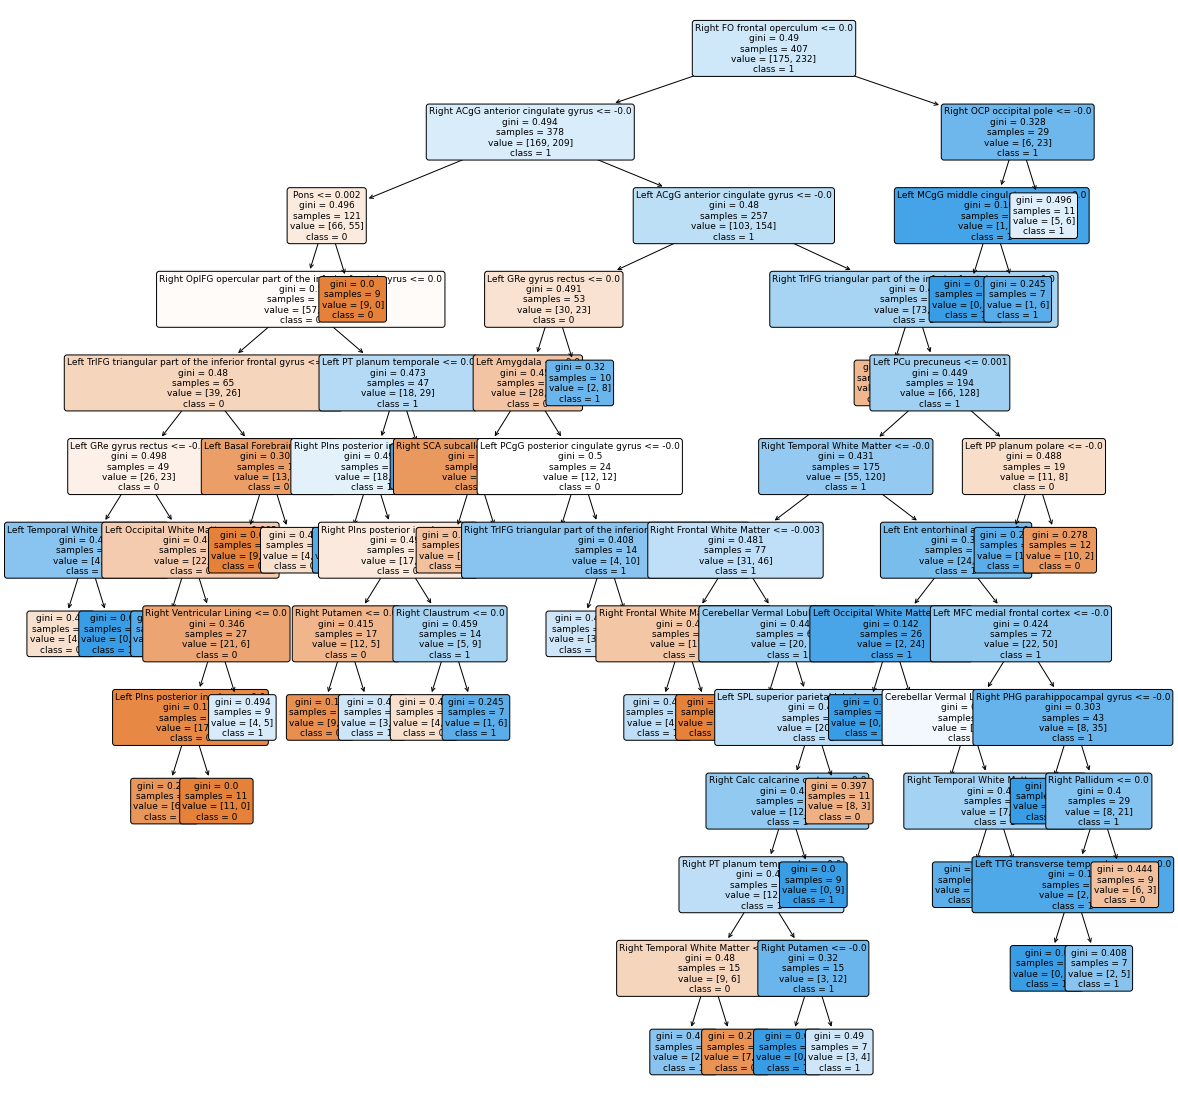

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(clf_decision_tree_cart.best_estimator_, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True, fontsize=9)
plt.show()

### RANDOM FOREST

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_random_forest = RandomForestClassifier(n_estimators=25, bootstrap=True, class_weight='balanced', 
                                           criterion='gini', max_features='log2', min_samples_leaf=0.01, 
                                           min_samples_split=0.01, random_state = 48)

scores_rf = cross_val_score(clf_random_forest, X_train, y_train, cv=fold)
print("Random Forest train accuracy scores: {}".format(scores_rf))
print("Random Forest train mean accuracy score: {:.2f} with {:.2f} standard deviation"
      .format(np.mean(scores_rf),np.std(scores_rf)))


Random Forest train accuracy scores: [0.65853659 0.41463415 0.56097561 0.53658537 0.53658537 0.6097561
 0.41463415 0.55       0.5        0.5       ]
Random Forest train mean accuracy score: 0.53 with 0.07 standard deviation


In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

params = {'n_estimators': [10, 15, 25, 50, 75],
               'max_depth': range(5, 15),
               'min_samples_split': [0.01, 2, 5, 10],
               'min_samples_leaf': [0.01, 1, 2, 4]}

clf_random_forest = RandomizedSearchCV(RandomForestClassifier(max_features='log2'), params, 
                                       random_state = 48, scoring=['accuracy','roc_auc'], cv = fold, 
                                       n_jobs = -1, refit='roc_auc')

clf_random_forest.fit(X_train, y_train)

print(clf_random_forest.best_score_)
print(clf_random_forest.best_params_)


y_pred_rf = clf_random_forest.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_rf)

roc_auc_score(y_test,y_pred_rf)

0.5384981528843422
{'n_estimators': 15, 'min_samples_split': 5, 'min_samples_leaf': 0.01, 'max_depth': 8}


0.5211598746081505

In [54]:
from sklearn.inspection import permutation_importance

feat_rf = []
for i,v in enumerate(clf_random_forest.best_estimator_.feature_importances_):
  feat_rf.append((X.columns[i],v))
feat_rf.sort(key = lambda x: x[1], reverse=True)

feat_rf_permutations = []
for i,v in enumerate(permutation_importance(clf_random_forest.best_estimator_, X, y, 
                                            n_repeats=10)['importances_mean']):
  feat_rf_permutations.append((X.columns[i],v))
feat_rf_permutations.sort(key = lambda x: x[1], reverse=True)

### EXTRA TREES

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

clf_extra_trees = ExtraTreesClassifier(random_state = 48)

scores_et = cross_val_score(clf_extra_trees, X_train, y_train, cv=fold)

print("Extra Trees train accuracy scores: {}".format(scores_et))
print("Extra Trees train mean accuracy score: {:.2f} with {:.2f} standard deviation"
      .format(np.mean(scores_et),np.std(scores_et)))


Extra Trees train accuracy scores: [0.56097561 0.48780488 0.53658537 0.46341463 0.53658537 0.6097561
 0.53658537 0.6        0.525      0.525     ]
Extra Trees train mean accuracy score: 0.54 with 0.04 standard deviation


In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

params = {'n_estimators': [10, 15, 20, 25, 30, 50, 75],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': range(5, 15),
               'min_samples_split': [0.01, 2, 5, 10],
               'min_samples_leaf': [0.01, 1, 2, 4]}

clf_extra_trees = RandomizedSearchCV(ExtraTreesClassifier(random_state = 101), params, random_state = 48, 
                               scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_extra_trees.fit(X_train, y_train)

print(clf_extra_trees.best_score_)
print(clf_extra_trees.best_params_)

y_pred_extra_trees = clf_extra_trees.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_extra_trees)

roc_auc_score(y_test,y_pred_extra_trees)

0.5605960500142085
{'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7}


0.5619122257053292

In [57]:
from sklearn.inspection import permutation_importance

feat_extra_trees = []
for i,v in enumerate(clf_extra_trees.best_estimator_.feature_importances_):
  feat_extra_trees.append((X.columns[i],v))
feat_extra_trees.sort(key = lambda x: x[1], reverse=True)

feat_extra_trees_permutations = []
for i,v in enumerate(permutation_importance(clf_extra_trees.best_estimator_, X, y, 
                                            n_repeats=10)['importances_mean']):
  feat_extra_trees_permutations.append((X.columns[i],v))
feat_extra_trees_permutations.sort(key = lambda x: x[1], reverse=True)

### GRADIENT BOOSTING

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf_gradient_boosting = GradientBoostingClassifier(random_state = 48)

scores_gb = cross_val_score(clf_gradient_boosting, X_train, y_train, cv=fold)

print("Gradient Boosting train accuracy scores: {}".format(scores_gb))
print("Gradient Boosting train mean accuracy score: {:.2f} with {:.2f} standard deviation"
      .format(np.mean(scores_gb),np.std(scores_gb)))


Gradient Boosting train accuracy scores: [0.53658537 0.43902439 0.46341463 0.51219512 0.51219512 0.63414634
 0.48780488 0.5        0.525      0.6       ]
Gradient Boosting train mean accuracy score: 0.52 with 0.06 standard deviation


In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

params = {
    "learning_rate": [0.001, 0.005, 0.01, 0.025],
    "min_samples_split": [0.01, 0.1, 0.5],
    "min_samples_leaf": [0.01, 0.1, 0.5],
    "max_depth": range(5,15),
    "subsample": [0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [10, 15, 20, 25, 50, 75]
    }


clf_gb = RandomizedSearchCV(GradientBoostingClassifier(max_features='log2'), params, 
                            random_state = 48, scoring=['accuracy','roc_auc'], cv = fold, 
                            n_jobs = -1, refit='roc_auc')

clf_gb.fit(X_train, y_train)

print(clf_gb.best_score_)
print(clf_gb.best_params_)

y_pred_gb = clf_gb.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_gb)

roc_auc_score(y_test,y_pred_gb)

0.5595694799658993
{'subsample': 0.95, 'n_estimators': 25, 'min_samples_split': 0.01, 'min_samples_leaf': 0.1, 'max_depth': 6, 'learning_rate': 0.001}


0.5

In [60]:
from sklearn.inspection import permutation_importance

feat_gb = []
for i,v in enumerate(clf_gb.best_estimator_.feature_importances_):
  feat_gb.append((X.columns[i],v))
feat_gb.sort(key = lambda x: x[1], reverse=True)


feat_gb_permutations = []
for i,v in enumerate(permutation_importance(clf_gb.best_estimator_, X, y, 
                                            n_repeats=10)['importances_mean']):
  feat_gb_permutations.append((X.columns[i],v))
feat_gb_permutations.sort(key = lambda x: x[1], reverse=True)

### ADABOOST

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

clf_adaboost = AdaBoostClassifier(random_state = 48)

scores_adaboost = cross_val_score(clf_adaboost, X_train, y_train, cv=fold)

print("Ada Boost train accuracy scores: {}".format(scores_adaboost))
print("Ada Boost train mean accuracy score: {:.2f} with {:.2f} standard deviation"
      .format(np.mean(scores_adaboost),np.std(scores_adaboost)))

Ada Boost train accuracy scores: [0.6097561  0.46341463 0.3902439  0.43902439 0.34146341 0.41463415
 0.36585366 0.475      0.45       0.475     ]
Ada Boost train mean accuracy score: 0.44 with 0.07 standard deviation


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

params = {
    "learning_rate": [0.001, 0.005, 0.01, 0.025, 0.5, 1],
    "algorithm": ['SAMME', 'SAMME.R'],
    "n_estimators": [10, 15, 20, 25, 50, 75]    
    }

clf_adaboost = RandomizedSearchCV(AdaBoostClassifier(random_state = 101), params, 
                                  random_state = 48, scoring=['accuracy','roc_auc'], 
                                  cv = fold, n_jobs = -1, refit='roc_auc')

clf_adaboost.fit(X_train, y_train)

print(clf_adaboost.best_score_)
print(clf_adaboost.best_params_)

from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_adaboost = clf_adaboost.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_adaboost)

roc_auc_score(y_test,y_pred_adaboost)

0.552118854788292
{'n_estimators': 25, 'learning_rate': 0.005, 'algorithm': 'SAMME.R'}


0.6210815047021944

In [63]:
feat_adaboost = []
for i,v in enumerate(clf_adaboost.best_estimator_.feature_importances_):
  feat_adaboost.append((X.columns[i],v))
feat_adaboost.sort(key = lambda x: x[1], reverse=True)

from sklearn.inspection import permutation_importance

feat_adaboost_permutations = []
for i,v in enumerate(permutation_importance(clf_adaboost.best_estimator_, X, y, 
                                            n_repeats=10)['importances_mean']):
  feat_adaboost_permutations.append((X.columns[i],v))
feat_adaboost_permutations.sort(key = lambda x: x[1], reverse=True)


### ANN

In [64]:
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, RMSprop
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, roc_auc_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# scaling data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(scaled, y, test_size=0.2, random_state = 48, stratify=y)


def base_model(optimizer, learning_rate):
    model = Sequential()   
    model.add(Dense(128, activation="relu"))  
    model.add(Dropout(0.5))    
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="softmax"))
    model.compile(loss='binary_crossentropy', optimizer=optimizer(lr=learning_rate), 
                  metrics=['accuracy',tf.keras.metrics.AUC(curve='ROC', name='roc_auc')])
    return model

clf_nn = KerasClassifier(build_fn=base_model,verbose=0)

params = {
    "optimizer": [Adam, SGD, Adadelta, Adagrad, RMSprop],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [25, 50, 100, 150, 250]  
    }

clf_nn = RandomizedSearchCV(clf_nn, params, random_state = 48, scoring=['accuracy','roc_auc'], 
                            cv = fold, n_jobs = -1, refit='roc_auc')
clf_nn.fit(X_train_norm,y_train_norm)


print(clf_nn.best_score_)
print(clf_nn.best_params_)


y_pred_nn = clf_nn.best_estimator_.predict(X_test_norm)

accuracy_score(y_test_norm,y_pred_nn)

roc_auc_score(y_test_norm,y_pred_nn)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.5
{'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>, 'learning_rate': 0.05, 'epochs': 250}


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.5

In [65]:
feat_nn_permutations = []
for i,v in enumerate(permutation_importance(clf_nn.best_estimator_, X, y, n_repeats=3)['importances_mean']):
  feat_nn_permutations.append((X.columns[i],v))
feat_nn_permutations.sort(key = lambda x: x[1], reverse=True)

### RESULT TABLE

In [66]:
result_table = pd.DataFrame(index=['Decision Tree','Random Forest','Extra Trees',
                                   'Gradient Boosting','AdaBoost','Neural Network'], 
                            columns = ['CV accuracy','test accuracy','CV AUC ROC','test AUC ROC',
                                       'Feature importance model output','Feature importance permutations'])


In [67]:
# DECISION TREE
result_table['CV accuracy']['Decision Tree'] = np.array(clf_decision_tree_cart.cv_results_['mean_test_accuracy']).max()
result_table['CV AUC ROC']['Decision Tree'] = np.array(clf_decision_tree_cart.cv_results_['mean_test_roc_auc']).max()

result_table['test accuracy']['Decision Tree'] = accuracy_score(y_test,y_pred_decision_tree)
result_table['test AUC ROC']['Decision Tree'] = roc_auc_score(y_test,y_pred_decision_tree)


result_table['Feature importance model output']['Decision Tree'] = feat_decision_tree
result_table['Feature importance permutations']['Decision Tree'] = feat_decision_tree_permutations



In [68]:
# RANDOM FOREST 
result_table['CV accuracy']['Random Forest'] = np.array(clf_random_forest.cv_results_['mean_test_accuracy']).max()
result_table['CV AUC ROC']['Random Forest'] = np.array(clf_random_forest.cv_results_['mean_test_roc_auc']).max()

result_table['test accuracy']['Random Forest'] = accuracy_score(y_test,y_pred_rf)
result_table['test AUC ROC']['Random Forest'] = roc_auc_score(y_test,y_pred_rf)


result_table['Feature importance model output']['Random Forest'] = feat_rf
result_table['Feature importance permutations']['Random Forest'] = feat_rf_permutations



In [69]:
# EXTRA TREES 
result_table['CV accuracy']['Extra Trees'] = np.array(clf_extra_trees.cv_results_['mean_test_accuracy']).max()
result_table['CV AUC ROC']['Extra Trees'] = np.array(clf_extra_trees.cv_results_['mean_test_roc_auc']).max()

result_table['test accuracy']['Extra Trees'] = accuracy_score(y_test,y_pred_extra_trees)
result_table['test AUC ROC']['Extra Trees'] = roc_auc_score(y_test,y_pred_extra_trees)


result_table['Feature importance model output']['Extra Trees'] = feat_extra_trees
result_table['Feature importance permutations']['Extra Trees'] = feat_extra_trees_permutations

In [70]:
# GRADIENT BOOSTING
result_table['CV accuracy']['Gradient Boosting'] = np.array(clf_gb.cv_results_['mean_test_accuracy']).max()
result_table['CV AUC ROC']['Gradient Boosting'] = np.array(clf_gb.cv_results_['mean_test_roc_auc']).max()

result_table['test accuracy']['Gradient Boosting'] = accuracy_score(y_test,y_pred_gb)
result_table['test AUC ROC']['Gradient Boosting'] = roc_auc_score(y_test,y_pred_gb)


result_table['Feature importance model output']['Gradient Boosting'] = feat_gb
result_table['Feature importance permutations']['Gradient Boosting'] = feat_gb_permutations

In [71]:
# ADA BOOST
result_table['CV accuracy']['AdaBoost'] = np.array(clf_adaboost.cv_results_['mean_test_accuracy']).max()
result_table['CV AUC ROC']['AdaBoost'] = np.array(clf_adaboost.cv_results_['mean_test_roc_auc']).max()

result_table['test accuracy']['AdaBoost'] = accuracy_score(y_test,y_pred_adaboost)
result_table['test AUC ROC']['AdaBoost'] = roc_auc_score(y_test,y_pred_adaboost)


result_table['Feature importance model output']['AdaBoost'] = feat_adaboost
result_table['Feature importance permutations']['AdaBoost'] = feat_adaboost_permutations

In [72]:
# NEURAL NETWORK
result_table['CV accuracy']['Neural Network'] = np.array(clf_nn.cv_results_['mean_test_accuracy']).max()
result_table['CV AUC ROC']['Neural Network'] = np.array(clf_nn.cv_results_['mean_test_roc_auc']).max()

result_table['test accuracy']['Neural Network'] = accuracy_score(y_test,y_pred_nn)
result_table['test AUC ROC']['Neural Network'] = roc_auc_score(y_test,y_pred_nn)

result_table['Feature importance model output']['Neural Network'] = 'Not available'
result_table['Feature importance permutations']['Neural Network'] = feat_nn_permutations

In [73]:
result_table

,CV accuracy,test accuracy,CV AUC ROC,test AUC ROC,Feature importance model output,Feature importance permutations
Decision Tree,0.570061,0.558824,0.522561,0.540752,"[(Right Temporal White Matter, 0.0728596630982...","[(Right ACgG anterior cingulate gyrus, 0.12082..."
Random Forest,0.557439,0.54902,0.538498,0.52116,"[(Left Ventricular Lining, 0.02821609401640431...","[(Cerebellar Vermal Lobules VI-VII, 0.00785854..."
Extra Trees,0.5725,0.607843,0.560596,0.561912,"[(Right ACgG anterior cingulate gyrus, 0.03752...","[(Right POrG posterior orbital gyrus, 0.034184..."
Gradient Boosting,0.570061,0.568627,0.559569,0.5,"[(Left ACgG anterior cingulate gyrus, 0.047988...","[(Brain Stem, 0.0), (Cerebellar Vermal Lobules..."
AdaBoost,0.567378,0.647059,0.552119,0.621082,"[(Left ACgG anterior cingulate gyrus, 0.56), (...","[(Left Ventricular Lining, 0.08310412573673867..."
Neural Network,0.570061,0.568627,0.5,0.5,Not available,"[(Brain Stem, 0.0), (Cerebellar Vermal Lobules..."


### FEATURE IMPORTANCES 

#### RANKING


In [74]:
# import pandas as pd
# import numpy as np
# result_table = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/experiments_baseline.csv', index_col=0)

# result_table

In [75]:
top10_et_inbuilt = []
for i in range(10):
  top10_et_inbuilt.append(str(i) + ' ' + result_table['Feature importance model output']['Extra Trees'][i][0])

top10_et_permutations = []
for i in range(10):
  top10_et_permutations.append(str(i) + ' ' + result_table['Feature importance permutations']['Extra Trees'][i][0])


In [76]:
print(top10_et_inbuilt)
print(top10_et_permutations)

['0 Right ACgG anterior cingulate gyrus', '1 Right Caudate', '2 Left SOG superior occipital gyrus', '3 Left Hippocampus', '4 Left MSFG superior frontal gyrus medial segment', '5 Left Parietal White Matter', '6 Right AOrG anterior orbital gyrus', '7 Left ACgG anterior cingulate gyrus', '8 Right Accumbens Area', '9 Cerebellar Vermal Lobules I-V']
['0 Right POrG posterior orbital gyrus', '1 Left Hippocampus', '2 Right FuG fusiform gyrus', '3 Left Ventricular Lining', '4 Right ACgG anterior cingulate gyrus', '5 Left ITG inferior temporal gyrus', '6 Right PCgG posterior cingulate gyrus', '7 Right IOG inferior occipital gyrus', '8 Right TrIFG triangular part of the inferior frontal gyrus', '9 Right OrIFG orbital part of the inferior frontal gyrus']


In [77]:
top10_ab_inbuilt = []
for i in range(10):
  top10_ab_inbuilt.append(str(i) + ' ' + result_table['Feature importance model output']['AdaBoost'][i][0])

top10_ab_permutations = []
for i in range(10):
  top10_ab_permutations.append(str(i) + ' ' + result_table['Feature importance permutations']['AdaBoost'][i][0])

In [78]:
print(top10_ab_inbuilt)
print(top10_ab_permutations)

['0 Left ACgG anterior cingulate gyrus', '1 Left Ventricular Lining', '2 Brain Stem', '3 Cerebellar Vermal Lobules I-V', '4 Cerebellar Vermal Lobules VI-VII', '5 Cerebellar Vermal Lobules VIII-X', '6 Corpus Callosum', '7 Left AIns anterior insula', '8 Left AOrG anterior orbital gyrus', '9 Left Accumbens Area']
['0 Left Ventricular Lining', '1 Left ACgG anterior cingulate gyrus', '2 Brain Stem', '3 Cerebellar Vermal Lobules I-V', '4 Cerebellar Vermal Lobules VI-VII', '5 Cerebellar Vermal Lobules VIII-X', '6 Corpus Callosum', '7 Left AIns anterior insula', '8 Left AOrG anterior orbital gyrus', '9 Left Accumbens Area']


In [79]:
REGIONAL_PREDICTORS_BASE_RANK = set.intersection(set(top10_et_inbuilt),set(top10_et_permutations),
                                                 set(top10_ab_inbuilt),set(top10_ab_permutations))
REGIONAL_PREDICTORS_BASE_RANK

set()

In [80]:
feature_importance_ranking_baseline = pd.DataFrame([top10_et_inbuilt,top10_et_permutations,
                                                    top10_ab_inbuilt,top10_ab_permutations], 
                                                   index=['Random Forest inbuilt','Random Forest Permutations', 
                                                          'AdaBoost inbuilt', 'AdaBoost permutations']).T

feature_importance_ranking_baseline

,Random Forest inbuilt,Random Forest Permutations,AdaBoost inbuilt,AdaBoost permutations
0,0 Right ACgG anterior cingulate gyrus,0 Right POrG posterior orbital gyrus,0 Left ACgG anterior cingulate gyrus,0 Left Ventricular Lining
1,1 Right Caudate,1 Left Hippocampus,1 Left Ventricular Lining,1 Left ACgG anterior cingulate gyrus
2,2 Left SOG superior occipital gyrus,2 Right FuG fusiform gyrus,2 Brain Stem,2 Brain Stem
3,3 Left Hippocampus,3 Left Ventricular Lining,3 Cerebellar Vermal Lobules I-V,3 Cerebellar Vermal Lobules I-V
4,4 Left MSFG superior frontal gyrus medial segment,4 Right ACgG anterior cingulate gyrus,4 Cerebellar Vermal Lobules VI-VII,4 Cerebellar Vermal Lobules VI-VII
5,5 Left Parietal White Matter,5 Left ITG inferior temporal gyrus,5 Cerebellar Vermal Lobules VIII-X,5 Cerebellar Vermal Lobules VIII-X
6,6 Right AOrG anterior orbital gyrus,6 Right PCgG posterior cingulate gyrus,6 Corpus Callosum,6 Corpus Callosum
7,7 Left ACgG anterior cingulate gyrus,7 Right IOG inferior occipital gyrus,7 Left AIns anterior insula,7 Left AIns anterior insula
8,8 Right Accumbens Area,8 Right TrIFG triangular part of the inferior ...,8 Left AOrG anterior orbital gyrus,8 Left AOrG anterior orbital gyrus
9,9 Cerebellar Vermal Lobules I-V,9 Right OrIFG orbital part of the inferior fro...,9 Left Accumbens Area,9 Left Accumbens Area


#### NO RANKING

In [81]:
# INTERSECTION WITHOUT RANKING

top10_et_inbuilt = []
for i in range(10):
  top10_et_inbuilt.append(result_table['Feature importance model output']['Extra Trees'][i][0])

top10_et_permutations = []
for i in range(10):
  top10_et_permutations.append(result_table['Feature importance permutations']['Extra Trees'][i][0])

top10_ab_inbuilt = []
for i in range(10):
  top10_ab_inbuilt.append(result_table['Feature importance model output']['AdaBoost'][i][0])

top10_ab_permutations = []
for i in range(10):
  top10_ab_permutations.append(result_table['Feature importance permutations']['AdaBoost'][i][0])


In [82]:
REGIONAL_PREDICTORS_BASE = set.intersection(set(top10_et_inbuilt),set(top10_et_permutations),
                                            set(top10_ab_inbuilt),set(top10_ab_permutations))
REGIONAL_PREDICTORS_BASE


set()

------------------------------------------------------------------------------------------------------------------------------------------------------------


## AGGREGATED DATA

In [84]:
# AGR DATA
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

#random_state = np.random.RandomState(23)
fold = StratifiedKFold(n_splits=10)


X_ag = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/clean_aggregated_dataset.csv').iloc[:,1:-1]
y = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/clean_aggregated_dataset.csv').iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ag, y, test_size=0.2, random_state = 48, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(407, 75) (102, 75) (407,) (102,)


### DECISION TREE

1.1. CART decision tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


for c in ['gini','entropy']:
  clf_decision_tree_cart = DecisionTreeClassifier(criterion=c, random_state = 48)
  clf_decision_tree_cart.fit(X_train,y_train)
  print(c) 
  print("Training score", clf_decision_tree_cart.score(X_train,y_train)) # training score
  print("Tree max depth is",clf_decision_tree_cart.tree_.max_depth)
  print("Tree node count is",clf_decision_tree_cart.tree_.node_count)
  scores = cross_val_score(clf_decision_tree_cart, X_train, y_train, cv=fold)
  print("DT train accuracy scores: {}".format(scores.mean()))

gini
Training score 1.0
Tree max depth is 14
Tree node count is 117
DT train accuracy scores: 0.5035975609756098
entropy
Training score 1.0
Tree max depth is 16
Tree node count is 111
DT train accuracy scores: 0.5183536585365853


In [86]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

parameters = {'max_depth':range(5,15),
              'min_samples_split':range(5,10),
              'min_samples_leaf':range(1,10),
              'min_impurity_decrease':[0.0, 0.001, 0.01, 0.05]
}

clf_decision_tree_cart = RandomizedSearchCV(DecisionTreeClassifier(criterion='gini', splitter='random'), 
                                      parameters, random_state = 42, scoring=['accuracy','roc_auc'], 
                                      cv=fold, n_jobs=-1, refit='roc_auc')
clf_decision_tree_cart.fit(X_train, y_train)

print(clf_decision_tree_cart.best_score_)
print(np.array(clf_decision_tree_cart.cv_results_['mean_test_accuracy']).max())

y_pred_decision_tree = clf_decision_tree_cart.best_estimator_.predict(X_test)

print(accuracy_score(y_test,y_pred_decision_tree))
print(roc_auc_score(y_test,y_pred_decision_tree))

0.5380221653878943
0.5700609756097561
0.5098039215686274
0.48942006269592475


In [87]:
from sklearn.inspection import permutation_importance

feat_decision_tree = []
for i,v in enumerate(clf_decision_tree_cart.best_estimator_.feature_importances_):
  feat_decision_tree.append((X_ag.columns[i],v))
feat_decision_tree.sort(key = lambda x: x[1], reverse=True)

feat_decision_tree_permutations = []
for i,v in enumerate(permutation_importance(clf_decision_tree_cart.best_estimator_, X_ag, y, n_repeats=10)['importances_mean']):
  feat_decision_tree_permutations.append((X_ag.columns[i],v))

feat_decision_tree_permutations.sort(key = lambda x: x[1], reverse=True)

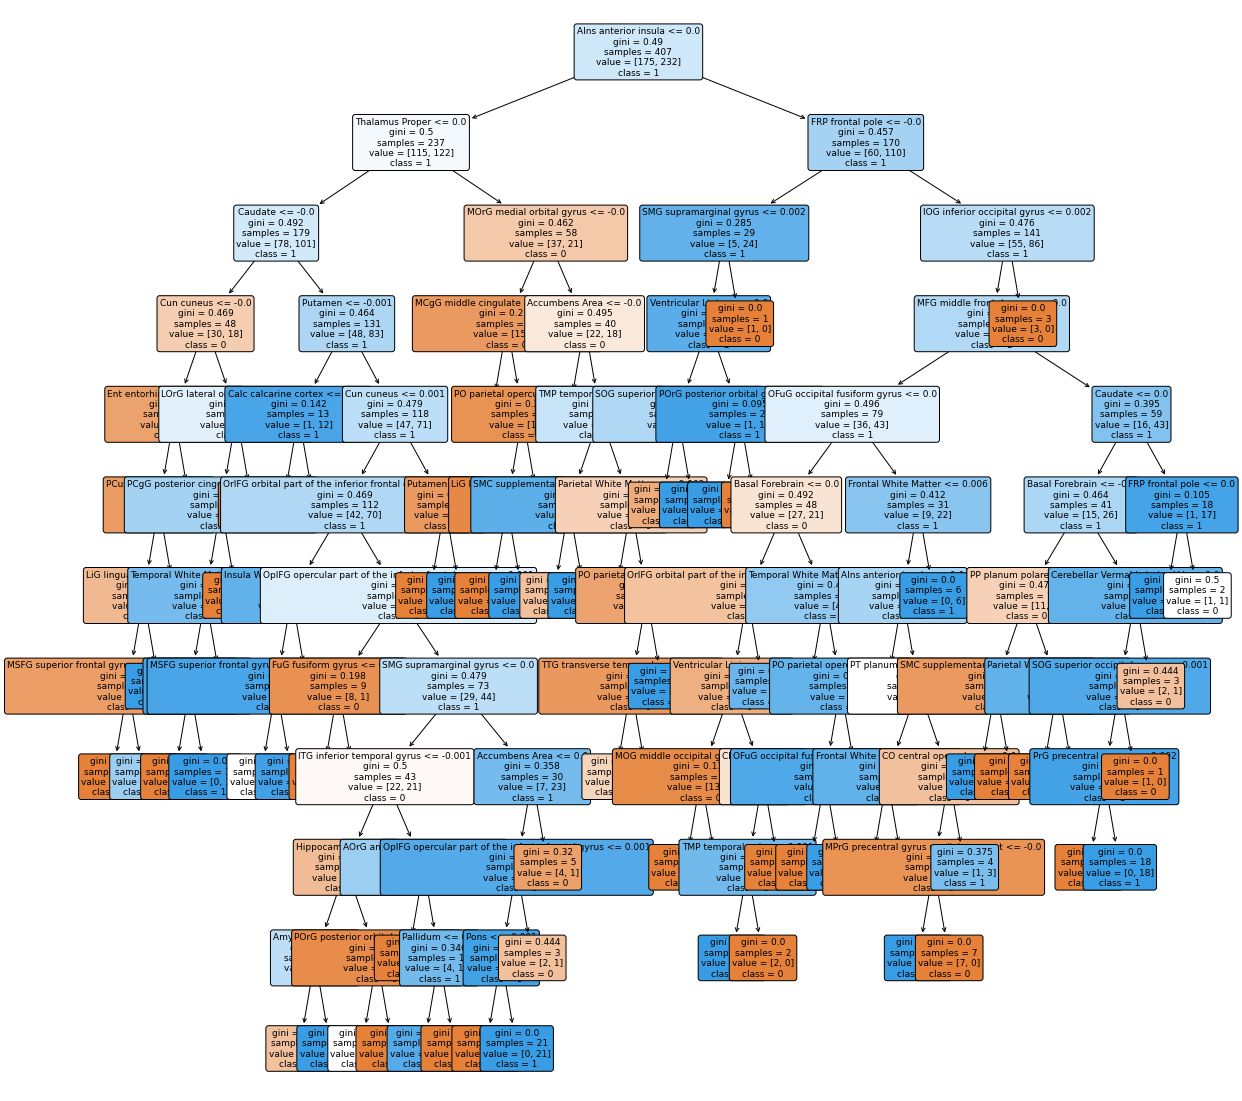

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree



plt.figure(figsize=(20, 20))
plot_tree(clf_decision_tree_cart.best_estimator_, feature_names=X_ag.columns, class_names=['0','1'], filled=True, rounded=True, fontsize=9)
plt.show()

### RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_random_forest = RandomForestClassifier(n_estimators=25, bootstrap=True, class_weight='balanced', criterion='gini',
                                           max_features='log2', min_samples_leaf=0.01, min_samples_split=0.01, random_state = 48)

scores_rf = cross_val_score(clf_random_forest, X_train, y_train, cv=fold)
print("Random Forest train accuracy scores: {}".format(scores_rf))
print("Random Forest train mean accuracy score: {:.2f} with {:.2f} standard deviation"
      .format(np.mean(scores_rf),np.std(scores_rf)))


Random Forest train accuracy scores: [0.6097561  0.53658537 0.70731707 0.36585366 0.53658537 0.6097561
 0.48780488 0.4        0.625      0.55      ]
Random Forest train mean accuracy score: 0.54 with 0.10 standard deviation


In [90]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

params = {'n_estimators': [10, 15, 25, 50, 75],
               'max_depth': range(5, 15),
               'min_samples_split': [0.01, 2, 5, 10],
               'min_samples_leaf': [0.01, 1, 2, 4]}

clf_random_forest = RandomizedSearchCV(RandomForestClassifier(max_features='log2', random_state = 101), 
                                       params, random_state = 48,  scoring=['accuracy','roc_auc'], 
                                       cv = fold, n_jobs = -1, refit='roc_auc')

clf_random_forest.fit(X_train, y_train)

print(clf_random_forest.best_score_)
print(clf_random_forest.best_params_)

y_pred_rf = clf_random_forest.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_rf)

roc_auc_score(y_test,y_pred_rf)

0.5413256606990622
{'n_estimators': 25, 'min_samples_split': 0.01, 'min_samples_leaf': 1, 'max_depth': 7}


0.48667711598746083

In [91]:
from sklearn.inspection import permutation_importance
feat_rf = []
for i,v in enumerate(clf_random_forest.best_estimator_.feature_importances_):
  feat_rf.append((X_ag.columns[i],v))
feat_rf.sort(key = lambda x: x[1], reverse=True)

feat_rf_permutations = []
for i,v in enumerate(permutation_importance(clf_random_forest.best_estimator_, X_ag, y, n_repeats=10)['importances_mean']):
  feat_rf_permutations.append((X_ag.columns[i],v))
feat_rf_permutations.sort(key = lambda x: x[1], reverse=True)

### EXTRA TREES

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

clf_extra_trees = ExtraTreesClassifier(random_state = 48)

scores_et = cross_val_score(clf_extra_trees, X_train, y_train, cv=fold)

print("Extra Trees train accuracy scores: {}".format(scores_et))
print("Extra Trees train mean accuracy score: {:.2f} with {:.2f} standard deviation"
      .format(np.mean(scores_et),np.std(scores_et)))


Extra Trees train accuracy scores: [0.58536585 0.36585366 0.53658537 0.51219512 0.53658537 0.65853659
 0.6097561  0.45       0.55       0.475     ]
Extra Trees train mean accuracy score: 0.53 with 0.08 standard deviation


In [93]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {'n_estimators': [10, 15, 20, 25, 30, 50, 75],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': range(5, 15),
               'min_samples_split': [0.01, 2, 5, 10],
               'min_samples_leaf': [0.01, 1, 2, 4]}

clf_extra_trees = RandomizedSearchCV(ExtraTreesClassifier(), params, random_state = 48, 
                               scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_extra_trees.fit(X_train, y_train)

print(clf_extra_trees.best_score_)
print(clf_extra_trees.best_params_)

from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_extra_trees = clf_extra_trees.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_extra_trees)

roc_auc_score(y_test,y_pred_extra_trees)

0.5603651605569764
{'n_estimators': 75, 'min_samples_split': 5, 'min_samples_leaf': 0.01, 'max_features': 'sqrt', 'max_depth': 9}


0.5192006269592476

In [94]:
from sklearn.inspection import permutation_importance

feat_extra_trees = []
for i,v in enumerate(clf_extra_trees.best_estimator_.feature_importances_):
  feat_extra_trees.append((X_ag.columns[i],v))
feat_extra_trees.sort(key = lambda x: x[1], reverse=True)

feat_extra_trees_permutations = []
for i,v in enumerate(permutation_importance(clf_extra_trees.best_estimator_, X_ag, y, n_repeats=10)['importances_mean']):
  feat_extra_trees_permutations.append((X_ag.columns[i],v))
feat_extra_trees_permutations.sort(key = lambda x: x[1], reverse=True)

### GRADIENT BOOSTING

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf_gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001, random_state = 48)

scores_gb = cross_val_score(clf_gradient_boosting, X_train, y_train, cv=fold)

print("Gradient Boosting train accuracy scores: {}".format(scores_gb))
print("Gradient Boosting train mean accuracy score: {:.2f} with {:.2f} standard deviation"
      .format(np.mean(scores_gb),np.std(scores_gb)))


Gradient Boosting train accuracy scores: [0.58536585 0.58536585 0.56097561 0.56097561 0.56097561 0.56097561
 0.56097561 0.575      0.575      0.575     ]
Gradient Boosting train mean accuracy score: 0.57 with 0.01 standard deviation


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

params = {
    "learning_rate": [0.001, 0.005, 0.01, 0.025],
    "min_samples_split": [0.01, 0.1, 0.5],
    "min_samples_leaf": [0.01, 0.1, 0.5],
    "max_depth": range(5,15),
    "subsample": [0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [10, 15, 20, 25, 50, 75]
    }


clf_gb = RandomizedSearchCV(GradientBoostingClassifier(max_features='log2',random_state = 101), params, 
                            random_state = 48, scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_gb.fit(X_train, y_train)

print(clf_gb.best_score_)
print(clf_gb.best_params_)

y_pred_gb = clf_gb.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_gb)

roc_auc_score(y_test,y_pred_gb)

0.574083546462063
{'subsample': 0.95, 'n_estimators': 25, 'min_samples_split': 0.01, 'min_samples_leaf': 0.1, 'max_depth': 6, 'learning_rate': 0.001}


0.5

In [97]:
from sklearn.inspection import permutation_importance

feat_gb = []
for i,v in enumerate(clf_gb.best_estimator_.feature_importances_):
  feat_gb.append((X_ag.columns[i],v))
feat_gb.sort(key = lambda x: x[1], reverse=True)

feat_gb_permutations = []
for i,v in enumerate(permutation_importance(clf_gb.best_estimator_, X_ag, y, n_repeats=10)['importances_mean']):
  feat_gb_permutations.append((X_ag.columns[i],v))
feat_gb_permutations.sort(key = lambda x: x[1], reverse=True)

### ADABOOST

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

clf_adaboost = AdaBoostClassifier(n_estimators=100, random_state = 48)

scores_adaboost = cross_val_score(clf_adaboost, X_train, y_train, cv=fold)

print("Ada Boost train accuracy scores: {}".format(scores_adaboost))
print("Ada Boost train mean accuracy score: {:.2f} with {:.2f} standard deviation"
      .format(np.mean(scores_adaboost),np.std(scores_adaboost)))

Ada Boost train accuracy scores: [0.56097561 0.58536585 0.51219512 0.51219512 0.41463415 0.56097561
 0.51219512 0.375      0.5        0.525     ]
Ada Boost train mean accuracy score: 0.51 with 0.06 standard deviation


In [99]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {
    "learning_rate": [0.001, 0.005, 0.01, 0.025, 0.5, 1],
    "algorithm": ['SAMME', 'SAMME.R'],
    "n_estimators": [10, 15, 20, 25, 50, 75]    
    }

clf_adaboost = RandomizedSearchCV(AdaBoostClassifier(random_state = 101), params, random_state = 48, 
                               scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_adaboost.fit(X_train, y_train)

print(clf_adaboost.best_score_)
print(clf_adaboost.best_params_)

from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_adaboost = clf_adaboost.best_estimator_.predict(X_test)

accuracy_score(y_test,y_pred_adaboost)

roc_auc_score(y_test,y_pred_adaboost)

0.5785574737141234
{'n_estimators': 10, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


0.5724921630094044

In [100]:
feat_adaboost = []
for i,v in enumerate(clf_adaboost.best_estimator_.feature_importances_):
  feat_adaboost.append((X_ag.columns[i],v))
feat_adaboost.sort(key = lambda x: x[1], reverse=True)

from sklearn.inspection import permutation_importance

feat_adaboost_permutations = []
for i,v in enumerate(permutation_importance(clf_adaboost.best_estimator_, X_ag, y, n_repeats=10)['importances_mean']):
  feat_adaboost_permutations.append((X_ag.columns[i],v))
feat_adaboost_permutations.sort(key = lambda x: x[1], reverse=True)


### ANN

In [101]:
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, RMSprop
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, roc_auc_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_ag)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(scaled, y, test_size=0.2, random_state = 48, stratify=y)


# include normalizing and dropout
def base_model(optimizer, learning_rate):
    model = Sequential()   
    model.add(Dense(128, activation="relu"))  
    model.add(Dropout(0.5))    
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="softmax"))
    model.compile(loss='binary_crossentropy', optimizer=optimizer(lr=learning_rate), 
                  metrics=['accuracy',tf.keras.metrics.AUC(curve='ROC', name='roc_auc')])
    return model

clf_nn = KerasClassifier(build_fn=base_model,verbose=0)

params = {
    "optimizer": [Adam, SGD, Adadelta, Adagrad, RMSprop],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [25, 50, 100, 150, 250]  
    }

clf_nn = RandomizedSearchCV(clf_nn, params, random_state = 48, scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')
clf_nn.fit(X_train_norm,y_train_norm)

print(clf_nn.best_score_)
print(clf_nn.best_params_)

y_pred_nn = clf_nn.best_estimator_.predict(X_test_norm)

print(accuracy_score(y_test_norm,y_pred_nn))

print(roc_auc_score(y_test_norm,y_pred_nn))


0.5
{'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>, 'learning_rate': 0.05, 'epochs': 250}
0.5686274509803921
0.5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [102]:
feat_nn_permutations = []
for i,v in enumerate(permutation_importance(clf_nn.best_estimator_, X_ag, y, n_repeats=3)['importances_mean']):
  feat_nn_permutations.append((X_ag.columns[i],v))
feat_nn_permutations.sort(key = lambda x: x[1], reverse=True)


### RESULT TABLE

In [103]:
result_table_agr = pd.DataFrame(index=['Decision Tree','Random Forest','Extra Trees',
                                       'Gradient Boosting','AdaBoost','Neural Network'], 
                            columns = ['CV accuracy','test accuracy','CV AUC ROC','test AUC ROC',
                                       'Feature importance model output','Feature importance permutations'])


In [104]:
# DECISION TREE
result_table_agr['CV accuracy']['Decision Tree'] = np.array(clf_decision_tree_cart.cv_results_['mean_test_accuracy']).max()
result_table_agr['CV AUC ROC']['Decision Tree'] = np.array(clf_decision_tree_cart.cv_results_['mean_test_roc_auc']).max()

result_table_agr['test accuracy']['Decision Tree'] = accuracy_score(y_test,y_pred_decision_tree)
result_table_agr['test AUC ROC']['Decision Tree'] = roc_auc_score(y_test,y_pred_decision_tree)


result_table_agr['Feature importance model output']['Decision Tree'] = feat_decision_tree
result_table_agr['Feature importance permutations']['Decision Tree'] = feat_decision_tree_permutations



In [105]:
# RANDOM FOREST 
result_table_agr['CV accuracy']['Random Forest'] = np.array(clf_random_forest.cv_results_['mean_test_accuracy']).max()
result_table_agr['CV AUC ROC']['Random Forest'] = np.array(clf_random_forest.cv_results_['mean_test_roc_auc']).max()

result_table_agr['test accuracy']['Random Forest'] = accuracy_score(y_test,y_pred_rf)
result_table_agr['test AUC ROC']['Random Forest'] = roc_auc_score(y_test,y_pred_rf)


result_table_agr['Feature importance model output']['Random Forest'] = feat_rf
result_table_agr['Feature importance permutations']['Random Forest'] = feat_rf_permutations


In [106]:
# EXTRA TREES 
result_table_agr['CV accuracy']['Extra Trees'] = np.array(clf_extra_trees.cv_results_['mean_test_accuracy']).max()
result_table_agr['CV AUC ROC']['Extra Trees'] = np.array(clf_extra_trees.cv_results_['mean_test_roc_auc']).max()

result_table_agr['test accuracy']['Extra Trees'] = accuracy_score(y_test,y_pred_extra_trees)
result_table_agr['test AUC ROC']['Extra Trees'] = roc_auc_score(y_test,y_pred_extra_trees)


result_table_agr['Feature importance model output']['Extra Trees'] = feat_extra_trees
result_table_agr['Feature importance permutations']['Extra Trees'] = feat_extra_trees_permutations

In [107]:
# GRADIENT BOOSTING
result_table_agr['CV accuracy']['Gradient Boosting'] = np.array(clf_gb.cv_results_['mean_test_accuracy']).max()
result_table_agr['CV AUC ROC']['Gradient Boosting'] = np.array(clf_gb.cv_results_['mean_test_roc_auc']).max()

result_table_agr['test accuracy']['Gradient Boosting'] = accuracy_score(y_test,y_pred_gb)
result_table_agr['test AUC ROC']['Gradient Boosting'] = roc_auc_score(y_test,y_pred_gb)


result_table_agr['Feature importance model output']['Gradient Boosting'] = feat_gb
result_table_agr['Feature importance permutations']['Gradient Boosting'] = feat_gb_permutations


In [108]:
# ADA BOOST
result_table_agr['CV accuracy']['AdaBoost'] = np.array(clf_adaboost.cv_results_['mean_test_accuracy']).max()
result_table_agr['CV AUC ROC']['AdaBoost'] = np.array(clf_adaboost.cv_results_['mean_test_roc_auc']).max()

result_table_agr['test accuracy']['AdaBoost'] = accuracy_score(y_test,y_pred_adaboost)
result_table_agr['test AUC ROC']['AdaBoost'] = roc_auc_score(y_test,y_pred_adaboost)


result_table_agr['Feature importance model output']['AdaBoost'] = feat_adaboost
result_table_agr['Feature importance permutations']['AdaBoost'] = feat_adaboost_permutations


In [109]:
# NEURAL NETWORK
result_table_agr['CV accuracy']['Neural Network'] = np.array(clf_nn.cv_results_['mean_test_accuracy']).max()
result_table_agr['CV AUC ROC']['Neural Network'] = np.array(clf_nn.cv_results_['mean_test_roc_auc']).max()

result_table_agr['test accuracy']['Neural Network'] = accuracy_score(y_test,y_pred_nn)
result_table_agr['test AUC ROC']['Neural Network'] = roc_auc_score(y_test,y_pred_nn)

result_table_agr['Feature importance model output']['Neural Network'] = 'Not available'
result_table_agr['Feature importance permutations']['Neural Network'] = feat_nn_permutations


In [110]:
result_table_agr

,CV accuracy,test accuracy,CV AUC ROC,test AUC ROC,Feature importance model output,Feature importance permutations
Decision Tree,0.570061,0.509804,0.538022,0.48942,"[(Accumbens Area, 0.04946218589050214), (Cauda...","[(AIns anterior insula, 0.1943025540275049), (..."
Random Forest,0.555366,0.509804,0.541326,0.486677,"[(ACgG anterior cingulate gyrus, 0.03022817413...","[(ACgG anterior cingulate gyrus, 0.01080550098..."
Extra Trees,0.567622,0.568627,0.560365,0.519201,"[(ACgG anterior cingulate gyrus, 0.03206750645...","[(ACgG anterior cingulate gyrus, 0.02848722986..."
Gradient Boosting,0.570061,0.568627,0.574084,0.5,"[(ACgG anterior cingulate gyrus, 0.11753634000...","[(Brain Stem, 0.0), (Cerebellar Vermal Lobules..."
AdaBoost,0.572561,0.598039,0.578557,0.572492,"[(FO frontal operculum, 0.26628110842010644), ...","[(Ventricular Lining, 0.04361493123772105), (A..."
Neural Network,0.570061,0.568627,0.5,0.5,Not available,"[(Brain Stem, 0.0), (Cerebellar Vermal Lobules..."


### FEATURE IMPORTANCES

#### RANKING

In [111]:
top10_dt_inbuilt_ag = []
for i in range(10):
  top10_dt_inbuilt_ag.append(str(i) + ' ' + result_table_agr['Feature importance model output']['Decision Tree'][i][0])

top10_dt_permutations_ag = []
for i in range(10):
  top10_dt_permutations_ag.append(str(i) + ' ' + result_table_agr['Feature importance permutations']['Decision Tree'][i][0])


In [112]:
print(top10_dt_inbuilt_ag)
print(top10_dt_permutations_ag)

['0 Accumbens Area', '1 Caudate', '2 Temporal White Matter', '3 TMP temporal pole', '4 Basal Forebrain', '5 OrIFG orbital part of the inferior frontal gyrus', '6 AIns anterior insula', '7 OpIFG opercular part of the inferior frontal gyrus', '8 Parietal White Matter', '9 SMC supplementary motor cortex']
['0 AIns anterior insula', '1 Thalamus Proper', '2 Caudate', '3 FRP frontal pole', '4 Cun cuneus', '5 Basal Forebrain', '6 OFuG occipital fusiform gyrus', '7 MFG middle frontal gyrus', '8 SMG supramarginal gyrus', '9 OpIFG opercular part of the inferior frontal gyrus']


In [113]:
top10_ab_inbuilt_ag = []
for i in range(10):
  top10_ab_inbuilt_ag.append(str(i) + ' ' + result_table_agr['Feature importance model output']['AdaBoost'][i][0])

top10_ab_permutations_ag = []
for i in range(10):
  top10_ab_permutations_ag.append(str(i) + ' ' + result_table_agr['Feature importance permutations']['AdaBoost'][i][0])


In [114]:
print(top10_ab_inbuilt_ag)
print(top10_ab_permutations_ag)

['0 FO frontal operculum', '1 ACgG anterior cingulate gyrus', '2 Ventricular Lining', '3 OCP occipital pole', '4 Hippocampus', '5 Cerebellar Vermal Lobules VIII-X', '6 STG superior temporal gyrus', '7 Brain Stem', '8 Cerebellar Vermal Lobules I-V', '9 Cerebellar Vermal Lobules VI-VII']
['0 Ventricular Lining', '1 ACgG anterior cingulate gyrus', '2 Hippocampus', '3 OCP occipital pole', '4 FO frontal operculum', '5 Cerebellar Vermal Lobules VIII-X', '6 Brain Stem', '7 Cerebellar Vermal Lobules I-V', '8 Cerebellar Vermal Lobules VI-VII', '9 Corpus Callosum']


In [115]:
REGIONAL_PREDICTORS_AGGREGATED_RANK = set.intersection(set(top10_dt_inbuilt_ag),set(top10_dt_permutations_ag),
                                                       set(top10_ab_inbuilt_ag),set(top10_ab_permutations_ag))
REGIONAL_PREDICTORS_AGGREGATED_RANK

set()

In [116]:
feature_importance_ranking_aggregated = pd.DataFrame([top10_dt_inbuilt_ag,top10_dt_permutations_ag,
                                                      top10_ab_inbuilt_ag,top10_ab_permutations_ag],
                                                     index=['Decision Tree inbuilt','Decision Tree Permutations',
                                                            'AdaBoost inbuilt', 'AdaBoost permutations']).T

feature_importance_ranking_aggregated

,Decision Tree inbuilt,Decision Tree Permutations,AdaBoost inbuilt,AdaBoost permutations
0,0 Accumbens Area,0 AIns anterior insula,0 FO frontal operculum,0 Ventricular Lining
1,1 Caudate,1 Thalamus Proper,1 ACgG anterior cingulate gyrus,1 ACgG anterior cingulate gyrus
2,2 Temporal White Matter,2 Caudate,2 Ventricular Lining,2 Hippocampus
3,3 TMP temporal pole,3 FRP frontal pole,3 OCP occipital pole,3 OCP occipital pole
4,4 Basal Forebrain,4 Cun cuneus,4 Hippocampus,4 FO frontal operculum
5,5 OrIFG orbital part of the inferior frontal g...,5 Basal Forebrain,5 Cerebellar Vermal Lobules VIII-X,5 Cerebellar Vermal Lobules VIII-X
6,6 AIns anterior insula,6 OFuG occipital fusiform gyrus,6 STG superior temporal gyrus,6 Brain Stem
7,7 OpIFG opercular part of the inferior frontal...,7 MFG middle frontal gyrus,7 Brain Stem,7 Cerebellar Vermal Lobules I-V
8,8 Parietal White Matter,8 SMG supramarginal gyrus,8 Cerebellar Vermal Lobules I-V,8 Cerebellar Vermal Lobules VI-VII
9,9 SMC supplementary motor cortex,9 OpIFG opercular part of the inferior frontal...,9 Cerebellar Vermal Lobules VI-VII,9 Corpus Callosum


#### NO RANKING


In [117]:
# INTERSECTION WITHOUT RANKING

top10_dt_inbuilt_ag = []
for i in range(10):
  top10_dt_inbuilt_ag.append(result_table_agr['Feature importance model output']['Decision Tree'][i][0])

top10_dt_permutations_ag = []
for i in range(10):
  top10_dt_permutations_ag.append(result_table_agr['Feature importance permutations']['Decision Tree'][i][0])

top10_ab_inbuilt_ag = []
for i in range(10):
  top10_ab_inbuilt_ag.append(result_table_agr['Feature importance model output']['AdaBoost'][i][0])

top10_ab_permutations_ag = []
for i in range(10):
  top10_ab_permutations_ag.append(result_table_agr['Feature importance permutations']['AdaBoost'][i][0])


In [118]:
REGIONAL_PREDICTORS_AGGREGATED = set.intersection(set(top10_dt_inbuilt_ag),set(top10_dt_permutations_ag),
                                                  set(top10_ab_inbuilt_ag),set(top10_ab_permutations_ag))
REGIONAL_PREDICTORS_AGGREGATED

set()

## INTERSECTIONS FEATURE IMPORTANCES

In [119]:
print(REGIONAL_PREDICTORS_BASE_RANK)
print(REGIONAL_PREDICTORS_BASE)
print(REGIONAL_PREDICTORS_AGGREGATED_RANK)
print(REGIONAL_PREDICTORS_AGGREGATED)

set()
set()
set()
set()




---



# DEVELOPING BEST MODEL

DEVELOPING BEST MODEL :

AdaBoost + full dataset  (baseline)

Looking into different optimization + hyperparameter tuning, including weak learners (decision stumps) tuning 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


X = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/clean_dataset.csv').iloc[:,1:-1]

y = pd.read_csv('https://raw.githubusercontent.com/etodasha/educational_level_predictors/main/clean_dataset.csv').iloc[:,-1]

fold = StratifiedKFold(n_splits=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 48, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(407, 143) (102, 143) (407,) (102,)


In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# {'n_estimators': 25, 'learning_rate': 0.005, 'algorithm': 'SAMME.R'} as estimated before
clf_adaboost = AdaBoostClassifier(random_state = 101, n_estimators=25, learning_rate=0.005)

print('accuracy', np.mean(cross_val_score(clf_adaboost, X, y, scoring='accuracy', cv=fold)))
print('auc roc', np.mean(cross_val_score(clf_adaboost, X, y, scoring='roc_auc', cv=fold)))


accuracy 0.5972156862745098
auc roc 0.5755709807433945


## OPTIMIZATION


different decision stumps / weak learners 

In [122]:
adaboost_dev = pd.DataFrame(index=['Base','Decision Tree','Extra Tree','Logistic Regression','SVM'], 
                            columns = ['CV accuracy','test accuracy','CV AUC ROC','test AUC ROC'])

In [123]:
from sklearn.ensemble import AdaBoostClassifier #, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

######### BASE #########
params = {
    "learning_rate": [0.01, 0.011, 0.1],
    "n_estimators": [10, 15, 25]
    }

clf_adaboost_base = GridSearchCV(AdaBoostClassifier(), params, 
                            scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_adaboost_base.fit(X_train, y_train)
adaboost_dev['CV accuracy']['Base'] = np.mean(cross_val_score(clf_adaboost_base.best_estimator_, X, y, scoring='accuracy', cv=fold))
adaboost_dev['CV AUC ROC']['Base'] = np.mean(cross_val_score(clf_adaboost_base.best_estimator_, X, y, scoring='roc_auc', cv=fold))

y_pred_adaboost_base = clf_adaboost_base.best_estimator_.predict(X_test)
adaboost_dev['test accuracy']['Base'] = accuracy_score(y_test,y_pred_adaboost_base)
adaboost_dev['test AUC ROC']['Base'] = roc_auc_score(y_test,y_pred_adaboost_base)

######### DECISION TREE #########

params = {
    "learning_rate": [0.01, 0.011, 0.1],
    "n_estimators": [10, 15, 25]
    ,"base_estimator__max_depth": [1,2,4]
    ,"base_estimator__min_samples_leaf": [125,130,135]
    ,"base_estimator__min_samples_split": [2,5,10]
    }

clf_adaboost_dt = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params, 
                            scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_adaboost_dt.fit(X_train, y_train)
adaboost_dev['CV accuracy']['Decision Tree'] = np.mean(cross_val_score(clf_adaboost_dt.best_estimator_, X, y, scoring='accuracy', cv=fold))
adaboost_dev['CV AUC ROC']['Decision Tree'] = np.mean(cross_val_score(clf_adaboost_dt.best_estimator_, X, y, scoring='roc_auc', cv=fold))

y_pred_adaboost_dt = clf_adaboost_dt.best_estimator_.predict(X_test)
adaboost_dev['test accuracy']['Decision Tree'] = accuracy_score(y_test,y_pred_adaboost_dt)
adaboost_dev['test AUC ROC']['Decision Tree'] = roc_auc_score(y_test,y_pred_adaboost_dt)

######### EXTRA TREE #########

params = {
    "learning_rate": [0.01, 0.011, 0.1],
    "n_estimators": [10, 15, 25]
    ,"base_estimator__max_depth": [1,2,4]
    ,"base_estimator__min_samples_leaf": [125,130,135]
    ,"base_estimator__min_samples_split": [2,5,10]
    ,"base_estimator__criterion" :['gini', 'entropy']
    }

clf_adaboost_et = GridSearchCV(AdaBoostClassifier(base_estimator=ExtraTreeClassifier()), params, 
                            scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_adaboost_et.fit(X_train, y_train)
adaboost_dev['CV accuracy']['Extra Tree'] = np.mean(cross_val_score(clf_adaboost_et.best_estimator_, X, y, scoring='accuracy', cv=fold))
adaboost_dev['CV AUC ROC']['Extra Tree'] = np.mean(cross_val_score(clf_adaboost_et.best_estimator_, X, y, scoring='roc_auc', cv=fold))

y_pred_adaboost_et = clf_adaboost_et.best_estimator_.predict(X_test)
adaboost_dev['test accuracy']['Extra Tree'] = accuracy_score(y_test,y_pred_adaboost_et)
adaboost_dev['test AUC ROC']['Extra Tree'] = roc_auc_score(y_test,y_pred_adaboost_et)


######### LOGISTIC REGRESSION #########

params = {
    "learning_rate": [0.01, 0.011, 0.1],
    "n_estimators": [10, 15, 25]
    ,"base_estimator__C" :[0.01, 0.1, 1, 10, 50, 100, 500, 1000]
    }

clf_adaboost_lr = GridSearchCV(AdaBoostClassifier(base_estimator=LogisticRegression()), params, 
                            scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_adaboost_lr.fit(X_train, y_train)
adaboost_dev['CV accuracy']['Logistic Regression'] = np.mean(cross_val_score(clf_adaboost_lr.best_estimator_, X, y, scoring='accuracy', cv=fold))
adaboost_dev['CV AUC ROC']['Logistic Regression'] = np.mean(cross_val_score(clf_adaboost_lr.best_estimator_, X, y, scoring='roc_auc', cv=fold))

y_pred_adaboost_lr = clf_adaboost_lr.best_estimator_.predict(X_test)
adaboost_dev['test accuracy']['Logistic Regression'] = accuracy_score(y_test,y_pred_adaboost_lr)
adaboost_dev['test AUC ROC']['Logistic Regression'] = roc_auc_score(y_test,y_pred_adaboost_lr)

######### SUPPORT VECTOR MACHINE #########

params = {
    "learning_rate": [0.01, 0.011, 0.1],
    "n_estimators": [10, 15, 25]
    ,"base_estimator__C" :[0.01, 0.1, 1, 10, 50, 100]
    ,"base_estimator__kernel" :['linear']
    }

clf_adaboost_svm = GridSearchCV(AdaBoostClassifier(base_estimator=SVC(probability=True)), params, 
                            scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_adaboost_svm.fit(X_train, y_train)
adaboost_dev['CV accuracy']['SVM'] = np.mean(cross_val_score(clf_adaboost_svm.best_estimator_, X, y, scoring='accuracy', cv=fold))
adaboost_dev['CV AUC ROC']['SVM'] = np.mean(cross_val_score(clf_adaboost_svm.best_estimator_, X, y, scoring='roc_auc', cv=fold))

y_pred_adaboost_svm = clf_adaboost_svm.best_estimator_.predict(X_test)
adaboost_dev['test accuracy']['SVM'] = accuracy_score(y_test,y_pred_adaboost_svm)
adaboost_dev['test AUC ROC']['SVM'] = roc_auc_score(y_test,y_pred_adaboost_svm)




In [124]:
adaboost_dev

,CV accuracy,test accuracy,CV AUC ROC,test AUC ROC
Base,0.597216,0.647059,0.548459,0.621082
Decision Tree,0.599216,0.637255,0.582587,0.609718
Extra Tree,0.569765,0.568627,0.496328,0.5
Logistic Regression,0.569765,0.568627,0.475355,0.5
SVM,0.569765,0.568627,0.461121,0.5


In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# !! {'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 130, 'learning_rate': 0.011, 'n_estimators': 25}


params = {
    "learning_rate": [0.01, 0.011, 0.1],
    "n_estimators": [10, 15, 25, 50, 100]
    ,"base_estimator__max_depth": [1,2,4]
    ,"base_estimator__min_samples_leaf": [125,130,135]
    ,"base_estimator__min_samples_split": [2,5,10]
    }

clf_adaboost = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params, 
                            scoring=['accuracy','roc_auc'], cv = fold, n_jobs = -1, refit='roc_auc')

clf_adaboost.fit(X_train, y_train)

print(clf_adaboost.best_score_)
print(clf_adaboost.best_params_)

print('---')
print('Best train scores')
print('accuracy',np.array(clf_adaboost.cv_results_['mean_test_accuracy']).max())
print('auc roc',np.array(clf_adaboost.cv_results_['mean_test_roc_auc']).max())

print('---')
print('CV scores')
print('accuracy', np.mean(cross_val_score(clf_adaboost.best_estimator_, X, y, scoring='accuracy', cv=fold)))
print('auc roc', np.mean(cross_val_score(clf_adaboost.best_estimator_, X, y, scoring='roc_auc', cv=fold)))

from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_adaboost = clf_adaboost.best_estimator_.predict(X_test)
print('---')
print('test scores')
print('accuracy',accuracy_score(y_test,y_pred_adaboost))
print('auc roc',roc_auc_score(y_test,y_pred_adaboost))

clf = clf_adaboost.best_estimator_


0.5840100170502983
{'base_estimator__max_depth': 1, 'base_estimator__min_samples_leaf': 130, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 15}
---
Best train scores
accuracy 0.5995731707317074
auc roc 0.5840100170502983
---
CV scores
accuracy 0.5992156862745098
auc roc 0.5825869532766085
---
test scores
accuracy 0.6372549019607843
auc roc 0.609717868338558


In [126]:
clf

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=130,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                        

## FEATURE IMPORTANCES

In [19]:
features_inbuilt = []
for i,v in enumerate(clf.feature_importances_):
  if v != 0:
    features_inbuilt.append((X.columns[i],v))
    print(X.columns[i], '| Score: %.5f' % (v))
features_inbuilt.sort(key = lambda x: x[1], reverse=True)

from sklearn.inspection import permutation_importance

features_permutations = []
for i,v in enumerate(permutation_importance(clf, X, y, n_repeats=10)['importances_mean']):
  if v != 0:
    features_permutations.append((X.columns[i],v))
    print(X.columns[i], '| Score: %.5f' % (v))
features_permutations.sort(key = lambda x: x[1], reverse=True)


Left ACgG anterior cingulate gyrus | Score: 0.40000
Left Ventricular Lining | Score: 0.60000
Left ACgG anterior cingulate gyrus | Score: 0.02849
Left Ventricular Lining | Score: 0.06994


In [20]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(clf, cv=fold, scoring='roc_auc', min_features_to_select=10).fit(X,y)

features_rfecv = []

for i,v in enumerate(rfecv.estimator_.feature_importances_ ):
  if v != 0:
    features_rfecv.append((X.columns[i],v))
    print(X.columns[i], '| Score: %.5f' % (v))

features_rfecv.sort(key = lambda x: x[1], reverse=True)

Brain Stem | Score: 1.00000


In [3]:
pip install lime

     |████████████████████████████████| 276kB 13.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=565639136b3c4840187109ca21d90f13cf8fc12f28c4420526f7f9dd2d871a17
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [4]:
import lime
import lime.lime_tabular

features_lime = []

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train), mode='classification', training_labels=np.array(y_train),
                                                   feature_names=X.columns)

for x in range(len(X_test)):
  features_lime.append(explainer.explain_instance(X_test.iloc[x], clf.predict_proba, num_features=5).as_list())


In [16]:
ranked_features_lime = []
for i in range(len(features_lime)):
  for x in range(5):
    ranked_features_lime.append( [5-x, features_lime[i][x][0].replace('-0.00 < ','').
                                replace('0.00 < ','').replace('>','|').replace('<=','|').split(' |')[0]])
    
mean_ranked_features_lime = dict.fromkeys(set([x[1] for x in ranked_features_lime]))

for key in mean_ranked_features_lime:
  mean_ranked_features_lime[key] = {'score':0.0, 'counter':0}

for r, f in ranked_features_lime:
  mean_ranked_features_lime[f]['score'] += r
  mean_ranked_features_lime[f]['counter'] += 1

features_lime_final = []
for key in mean_ranked_features_lime:
   features_lime_final.append([key, 
                               str(mean_ranked_features_lime[key]['score']
                                   *mean_ranked_features_lime[key]['counter']
                                   /len(X_test))]) # weighted ranking through all sets of feature importances 

features_lime_final.sort(key = lambda x: float(x[1]), reverse=True)

In [17]:
features_lime_final[:5]
# --> i.e. just two features appear a lot in top 5s and have high ranking 

[['Left Ventricular Lining', '482.0'],
 ['Left ACgG anterior cingulate gyrus', '330.0'],
 ['Right AIns anterior insula', '0.7058823529411765'],
 ['Right MPrG precentral gyrus medial segment', '0.6470588235294118'],
 ['Left STG superior temporal gyrus', '0.5882352941176471']]

In [21]:
feature_importances = pd.DataFrame([features_inbuilt,features_permutations,features_rfecv,features_lime_final[:2]],
                                   index=['Inbuilt','Permutations','RFE CV', 'weighted LIME']).T

feature_importances  

,Inbuilt,Permutations,RFE CV,weighted LIME
0,"(Left Ventricular Lining, 0.6)","(Left Ventricular Lining, 0.06994106090373278)","(Brain Stem, 1.0)","[Left Ventricular Lining, 482.0]"
1,"(Left ACgG anterior cingulate gyrus, 0.4)","(Left ACgG anterior cingulate gyrus, 0.0284872...",None,"[Left ACgG anterior cingulate gyrus, 330.0]"
